# BIMBO GROUP INVENTORY DEMAND

Berdasarkan data publik,  produk dalam industri bakery terdiri atas  roti segar dan roti gulung (53%), kue /cracker/ pretzels (22%), cake/ pai/ pastri (18%), dan Tortillas (7%). Ada empat pemain utama  dalam industry Bakery Dunia, mereka adalah Grupo Bimbo, Mondelez International, Yamazaki Baking Company dan Kellogg Company. mereka menyumbang  10% dari pasar dan Grupo Bimbo adalah yang terbesar dengan 4% penguasaan pasar bakery dunia.

Variabel yang digunakan dalam data bimbo ini adalah sebagai berikut:
1. Semana adalah penjualan/ permintaan mingguan.
2. Agencia_ID adalah Depot Penjualan 
3. Canal_ID adalah ID saluran penjualan
4. Ruta_SAK adalah ID Rute
5. NombreCliente adalah nama klien 
6. NombreProducto adalah nama produk 
7. Venta_uni_hoy adalah jumlah unit yang terjual dalam minggu tersebut
8. Venta_hoy adalah penjualan dalam minggu tersebut dalam peso 
9. Dev_uni_proxima adalah jumlah pengembalian 
10. Dev_proxima adalah nilai pengembalian dalam peso
11. Demanda_uni_equil adalah jumlah permimntaan (Nilai yang akan di prediksi) 


# 1. Preparation

## 1.1. Library Loading

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
matplotlib.style.use('ggplot') 

import warnings
warnings.filterwarnings('ignore')

## 1.2. Datasets Loading

In [2]:
train = pd.read_csv('df_train.csv')
test= pd.read_csv('df_test.csv')
producto = pd.read_csv('producto_tabla.csv')
town_state = pd.read_csv('town_state.csv')
cliente = pd.read_csv('cliente_tabla.csv')

## 1.3. Concat Training and Testing Dataset

In [3]:
mix = pd.concat([train,test],axis=0).reset_index(drop=True)
print('Size of mix data', mix.shape)

Size of mix data (1000000, 12)


# 2. Data Quick Look

# 2.1. Quick Look

### 2.1.1. Data View and Dimension

In [4]:
print('Size of train data',train.shape)
display(train.head(3))
print('===================================================')
print('Size of test data',test.shape)
display(test.head(3))
print('===================================================')
print('Size of mix data',mix.shape)
display(mix.head(3))
print('===================================================')
print('Size of producto data', producto.shape)
display(producto.head(3))
print('===================================================')
print('Size of town_state data', town_state.shape)
display(town_state.head(3))
print('===================================================')
print('Size of cliente data', cliente.shape)
display(cliente.head(3))

Size of train data (670000, 11)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1656,1,1219,1446836,41938,4,39.64,0,0.0,4
1,8,4013,4,4912,62969,43118,13,132.73,0,0.0,13
2,3,1914,1,1107,2098200,1250,3,22.92,0,0.0,3


Size of test data (330000, 11)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,id
0,7,1130,1,1611,322306,35452,5,22.20,0,0.0,0
1,4,1350,1,2829,4489341,40680,2,13.72,0,0.0,1
2,6,1555,1,2815,2462099,43274,6,35.58,0,0.0,2


Size of mix data (1000000, 12)


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_uni_proxima,Producto_ID,Ruta_SAK,Semana,Venta_hoy,Venta_uni_hoy,id
0,1656,1,1446836,4.0,0.0,0,41938,1219,3,39.64,4,NaN
1,4013,4,62969,13.0,0.0,0,43118,4912,8,132.73,13,NaN
2,1914,1,2098200,3.0,0.0,0,1250,1107,3,22.92,3,NaN


Size of producto data (2592, 2)


,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41


Size of town_state data (790, 3)


,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO


Size of cliente data (935362, 2)


,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE


### 2.1.2. Data Type and Description

#### 1. Train dataset

In [5]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670000 entries, 0 to 669999
Data columns (total 11 columns):
Semana               670000 non-null int64
Agencia_ID           670000 non-null int64
Canal_ID             670000 non-null int64
Ruta_SAK             670000 non-null int64
Cliente_ID           670000 non-null int64
Producto_ID          670000 non-null int64
Venta_uni_hoy        670000 non-null int64
Venta_hoy            670000 non-null float64
Dev_uni_proxima      670000 non-null int64
Dev_proxima          670000 non-null float64
Demanda_uni_equil    670000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 56.2 MB


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
count,670000.000000,670000.000000,670000.000000,670000.000000,6.700000e+05,670000.000000,670000.000000,670000.000000,670000.000000,670000.000000,670000.000000
mean,5.948612,2537.544304,1.384870,2116.469896,1.802369e+06,20827.280266,7.349776,68.379301,0.142752,1.314138,7.254504
std,2.013050,4078.258069,1.464099,1489.864280,3.072353e+06,18657.550102,24.037040,286.281299,10.767142,70.484346,22.241510
min,3.000000,1110.000000,1.000000,1.000000,2.600000e+01,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1311.000000,1.000000,1161.000000,3.551560e+05,1242.000000,2.000000,16.760000,0.000000,0.000000,2.000000
50%,6.000000,1613.000000,1.000000,1286.000000,1.190794e+06,30548.000000,3.000000,30.000000,0.000000,0.000000,3.000000
75%,8.000000,2036.000000,1.000000,2802.000000,2.368561e+06,37361.000000,7.000000,56.250000,0.000000,0.000000,6.000000
max,9.000000,25759.000000,11.000000,9962.000000,2.015152e+09,49997.000000,7200.000000,32470.000000,6768.000000,51840.000000,4380.000000


#### 2. Test dataset

In [6]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330000 entries, 0 to 329999
Data columns (total 11 columns):
Semana             330000 non-null int64
Agencia_ID         330000 non-null int64
Canal_ID           330000 non-null int64
Ruta_SAK           330000 non-null int64
Cliente_ID         330000 non-null int64
Producto_ID        330000 non-null int64
Venta_uni_hoy      330000 non-null int64
Venta_hoy          330000 non-null float64
Dev_uni_proxima    330000 non-null int64
Dev_proxima        330000 non-null float64
id                 330000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 27.7 MB


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,id
count,330000.000000,330000.000000,330000.000000,330000.000000,3.300000e+05,330000.000000,330000.000000,330000.000000,330000.000000,330000.000000,330000.000000
mean,5.951433,2528.884436,1.384448,2115.399173,1.795771e+06,20861.608712,7.271045,67.786058,0.123348,1.238577,164999.500000
std,2.012596,4060.354106,1.469046,1488.663513,1.833270e+06,18672.189729,20.644295,286.310620,1.859310,22.668962,95262.938754
min,3.000000,1110.000000,1.000000,1.000000,2.600000e+01,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1312.000000,1.000000,1161.000000,3.570118e+05,1242.000000,2.000000,16.760000,0.000000,0.000000,82499.750000
50%,6.000000,1613.000000,1.000000,1285.000000,1.188260e+06,30549.000000,3.000000,30.000000,0.000000,0.000000,164999.500000
75%,8.000000,2036.000000,1.000000,2802.000000,2.368856e+06,37519.000000,6.000000,56.100000,0.000000,0.000000,247499.250000
max,9.000000,25759.000000,11.000000,9917.000000,1.169326e+07,49996.000000,3000.000000,36469.950000,420.000000,5854.800000,329999.000000


#### 3. Producto dataset

In [7]:
producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 2 columns):
Producto_ID       2592 non-null int64
NombreProducto    2592 non-null object
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


#### 4. Town_state dataset

In [8]:
town_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 3 columns):
Agencia_ID    790 non-null int64
Town          790 non-null object
State         790 non-null object
dtypes: int64(1), object(2)
memory usage: 18.6+ KB


#### 5. cliente dataset

In [9]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935362 entries, 0 to 935361
Data columns (total 2 columns):
Cliente_ID       935362 non-null int64
NombreCliente    935362 non-null object
dtypes: int64(1), object(1)
memory usage: 14.3+ MB


## Concat and Joining Data

In [10]:
mix_merged1 = pd.merge(mix,cliente,how='left',on=['Cliente_ID'])
mix_merged2 = pd.merge(mix_merged1,producto,how='left',on=['Producto_ID'])
mix_final = pd.merge(mix_merged2,town_state,how='left',on=['Agencia_ID'])

In [11]:
mix_final.head()

,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_uni_proxima,Producto_ID,Ruta_SAK,Semana,Venta_hoy,Venta_uni_hoy,id,NombreCliente,NombreProducto,Town,State
0,1656,1,1446836,4.0,0.0,0,41938,1219,3,39.64,4,NaN,MARY PAZ,Mantecadas Nuez 123g BIM 41938,2407 TEPEACA,PUEBLA
1,4013,4,62969,13.0,0.0,0,43118,4912,8,132.73,13,NaN,OXXO LIBRAMIENTO,Mantecadas Nuez 123g MTA BIM 43118,2479 SANTA CATARINA BIMBO,NUEVO LEÓN
2,1914,1,2098200,3.0,0.0,0,1250,1107,3,22.92,3,NaN,PEDRO MELENDREZ MENDOZA,Donas Azucar 4p 105g BIM 1250,2293 GRANJAS MARINELA,JALISCO
3,1470,1,1525315,3.0,0.0,0,43316,2014,7,24.45,3,NaN,MINI SUPER MARTELL,Submarinos Vainilla 3p 105g SP MTA MLA 43316,2515 CAVAZOS,NUEVO LEÓN
4,2034,1,2239746,3.0,0.0,0,1212,1288,6,25.14,3,NaN,VINOS Y LICORES PEPITO,Roles Canela 2p 120g BIM 1212,2167 MORELIA LA HUERTA,MICHOACÁN


## Change Column Names to English 

In [12]:
mix_final.columns

Index(['Agencia_ID', 'Canal_ID', 'Cliente_ID', 'Demanda_uni_equil',
       'Dev_proxima', 'Dev_uni_proxima', 'Producto_ID', 'Ruta_SAK', 'Semana',
       'Venta_hoy', 'Venta_uni_hoy', 'id', 'NombreCliente', 'NombreProducto',
       'Town', 'State'],
      dtype='object')

In [13]:
new_columns = ['Agent_ID','Channel_ID','Client_ID','Adjusted_demand_target','Next_week_return','Next_week_returned_unit','Product_ID','Route_ID','Week_Number','This_week_sales','This_week_sales_unit','id','Client_name','Product_name','Town','State']

mix_final.columns = new_columns
mix_final.head()

,Agent_ID,Channel_ID,Client_ID,Adjusted_demand_target,Next_week_return,Next_week_returned_unit,Product_ID,Route_ID,Week_Number,This_week_sales,This_week_sales_unit,id,Client_name,Product_name,Town,State
0,1656,1,1446836,4.0,0.0,0,41938,1219,3,39.64,4,NaN,MARY PAZ,Mantecadas Nuez 123g BIM 41938,2407 TEPEACA,PUEBLA
1,4013,4,62969,13.0,0.0,0,43118,4912,8,132.73,13,NaN,OXXO LIBRAMIENTO,Mantecadas Nuez 123g MTA BIM 43118,2479 SANTA CATARINA BIMBO,NUEVO LEÓN
2,1914,1,2098200,3.0,0.0,0,1250,1107,3,22.92,3,NaN,PEDRO MELENDREZ MENDOZA,Donas Azucar 4p 105g BIM 1250,2293 GRANJAS MARINELA,JALISCO
3,1470,1,1525315,3.0,0.0,0,43316,2014,7,24.45,3,NaN,MINI SUPER MARTELL,Submarinos Vainilla 3p 105g SP MTA MLA 43316,2515 CAVAZOS,NUEVO LEÓN
4,2034,1,2239746,3.0,0.0,0,1212,1288,6,25.14,3,NaN,VINOS Y LICORES PEPITO,Roles Canela 2p 120g BIM 1212,2167 MORELIA LA HUERTA,MICHOACÁN


### 2.1.3. Exploratory Data Analysis

#### Target Feature Description

In [14]:
mix_final['Adjusted_demand_target'].describe()

count    675261.000000
mean          7.284429
std          22.299264
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        4380.000000
Name: Adjusted_demand_target, dtype: float64

It looks weird. The mean value is 7.2 while the maximum value is 4380. We're going to take a look on its distribution.

#### Target Feature Distribution

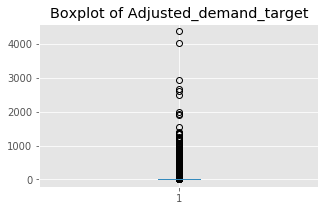

In [15]:
plt.figure(figsize=(5, 3))
plt.boxplot(x = 'Adjusted_demand_target',data=mix_final[mix_final['Adjusted_demand_target'].notnull()])

plt.title('Boxplot of Adjusted_demand_target')

plt.savefig('fig/1.png', tight_box=True)

In [16]:
mix_final['Adjusted_demand_target'].quantile(0.99)

65.0

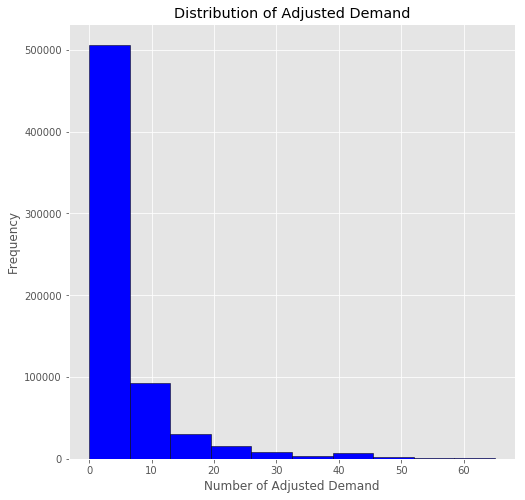

In [17]:
plt.figure(figsize=(8, 8))
plt.hist(x = 'Adjusted_demand_target', data=mix_final,bins=10,color='blue', edgecolor='k',range=(0,65.0))

plt.title('Distribution of Adjusted Demand')
plt.xlabel('Number of Adjusted Demand')
plt.ylabel('Frequency')

plt.savefig('fig/2.png',dpi=300, bbox_inches = "tight")

It appeared that there's a high variance in the distribution of TARGET data, shown by the plot. We will deal with this later. Whether we would declare some data as outlier, or binning them to make a more normal data.

#### Target Correlation

In [18]:
correlations = mix_final.corr()['Adjusted_demand_target'].sort_values(ascending=False)
correlations

Adjusted_demand_target     1.000000
This_week_sales_unit       0.938559
This_week_sales            0.777914
Channel_ID                 0.131009
Route_ID                   0.052760
Product_ID                 0.044357
Next_week_returned_unit    0.026381
Next_week_return           0.024617
Week_Number                0.002980
Agent_ID                  -0.004410
Client_ID                 -0.009072
id                              NaN
Name: Adjusted_demand_target, dtype: float64

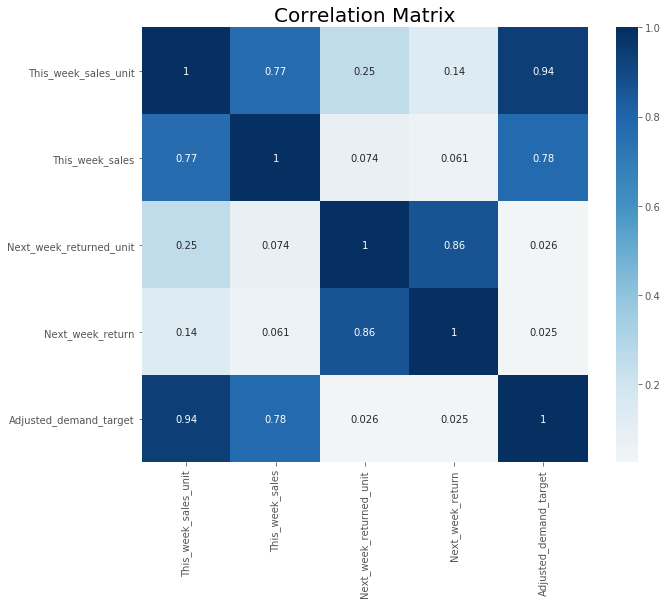

In [19]:
heatmap = mix_final[['This_week_sales_unit', 'This_week_sales', 'Next_week_returned_unit','Next_week_return', 'Adjusted_demand_target']]

plt.subplots(figsize = (10,8))
sns.heatmap(heatmap.corr(), annot=True,
            mask = np.zeros_like(heatmap.corr(), dtype=np.bool),
            cmap = 'RdBu', center = 0
           )
plt.title('Correlation Matrix', fontsize = 20)

plt.savefig('fig/3.png', tight_box=True)

#### Target vs numerical variabel scatter plot

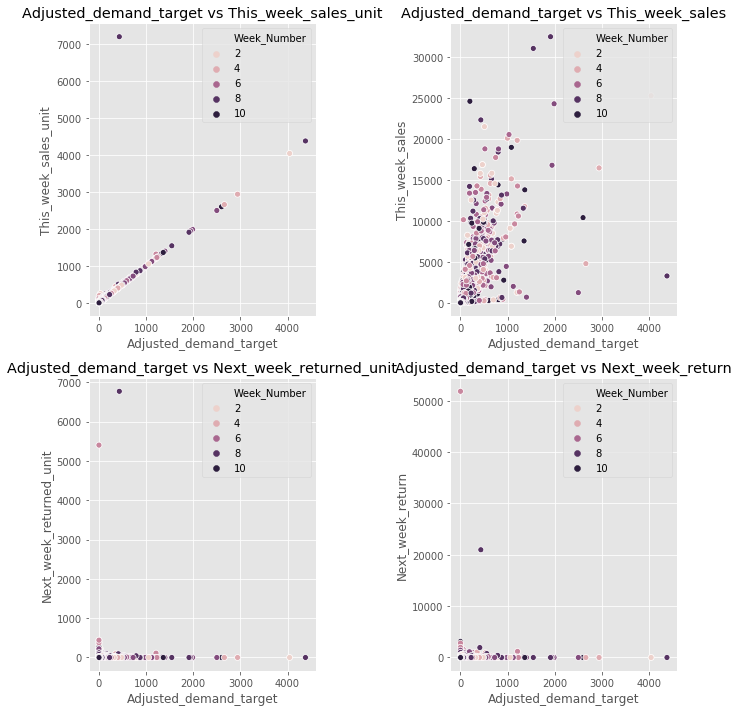

In [20]:
fig, ax = plt.subplots(2,2, figsize = (10,10),
#                        sharex=True,
#                        gridspec_kw= {"height_ratios": (0.2, 1)}
                      )

sns.scatterplot('Adjusted_demand_target', 'This_week_sales_unit', hue='Week_Number', data=mix_final,ax=ax[0,0])
ax[0,0].set_xlabel('Adjusted_demand_target')
ax[0,0].set_ylabel('This_week_sales_unit')
ax[0,0].set_title('Adjusted_demand_target vs This_week_sales_unit')

sns.scatterplot('Adjusted_demand_target', 'This_week_sales', hue='Week_Number', data=mix_final,ax=ax[0,1])
ax[0,1].set_xlabel('Adjusted_demand_target')
ax[0,1].set_ylabel('This_week_sales')
ax[0,1].set_title('Adjusted_demand_target vs This_week_sales')

sns.scatterplot('Adjusted_demand_target', 'Next_week_returned_unit', hue='Week_Number', data=mix_final,ax=ax[1,0])
ax[1,0].set_xlabel('Adjusted_demand_target')
ax[1,0].set_ylabel('Next_week_returned_unit')
ax[1,0].set_title('Adjusted_demand_target vs Next_week_returned_unit')

sns.scatterplot('Adjusted_demand_target', 'Next_week_return', hue='Week_Number', data=mix_final,ax=ax[1,1])
ax[1,1].set_xlabel('Adjusted_demand_target')
ax[1,1].set_ylabel('Next_week_return')
ax[1,1].set_title('Adjusted_demand_target vs Next_week_return')

fig.tight_layout()
plt.savefig('fig/4.png', dpi=300, bbox_inches = "tight")

This_week_sales_unit column which contains sumber of unit sold on the week seems to be highly correlated with the target column. There is some outlier data shown at around 7000 point of y axis. We will deal with that later.
Next_week_returned_unit which contains returned unit contains a lot of 0 value data. Which means most of items that was sold a week before is still in a good use on customer hands.

#### Target vs categorical variabel bar plot

In [21]:
Week_Number_demanda=mix_final.groupby(['Week_Number'])['Adjusted_demand_target'].sum().reset_index()
Week_Number_this_week=mix_final.groupby(['Week_Number'])['This_week_sales_unit'].sum().reset_index()

In [22]:
Week_Number_demanda

,Week_Number,Adjusted_demand_target
0,3,712520.0
1,4,729567.0
2,5,714512.0
3,6,676128.0
4,7,703497.0
5,8,701517.0
6,9,681150.0


In [23]:
Week_Number_this_week

,Week_Number,This_week_sales_unit
0,3,1062271
1,4,1104642
2,5,1075074
3,6,1026573
4,7,1057255
5,8,1057911
6,9,1029551


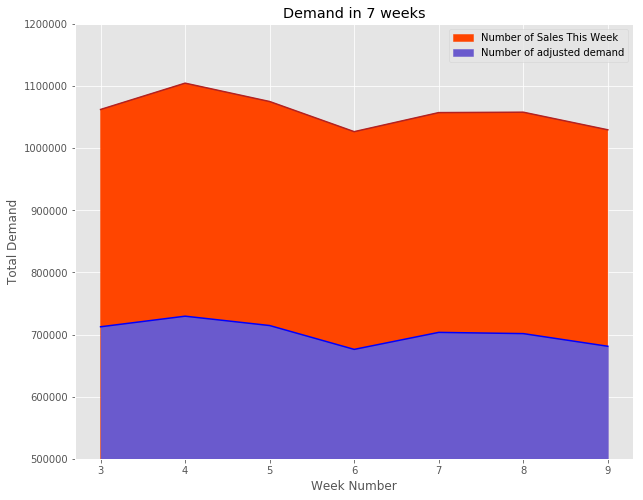

In [24]:
plt.figure(figsize = (10,8))
plt.fill_between('Week_Number','This_week_sales_unit',data=Week_Number_this_week, color='Orangered', label='Number of Sales This Week')
plt.fill_between('Week_Number','Adjusted_demand_target',data=Week_Number_demanda,color='Slateblue', label='Number of adjusted demand')
plt.plot('Week_Number','This_week_sales_unit',data=Week_Number_this_week, color='firebrick', label='_nolegend_')
plt.plot('Week_Number','Adjusted_demand_target',data=Week_Number_demanda,color='Blue', label='_nolegend_')
plt.title('Demand in 7 weeks')
plt.xlabel('Week Number')
plt.ylabel('Total Demand')
plt.ylim([500000,1200000])
plt.legend()
plt.savefig('fig/5.png',dpi=300, bbox_inches = "tight")

In [25]:
sales_return = mix_final[['Adjusted_demand_target','Week_Number','This_week_sales','This_week_sales_unit','Next_week_return','Next_week_returned_unit']]
sales_return['This_week_net_sales'] = sales_return['This_week_sales'] * sales_return['This_week_sales_unit']
sales_return['Next_week_returned_sales'] = sales_return['Next_week_return'] * sales_return['Next_week_returned_unit']
sales_return.head()

,Adjusted_demand_target,Week_Number,This_week_sales,This_week_sales_unit,Next_week_return,Next_week_returned_unit,This_week_net_sales,Next_week_returned_sales
0,4.0,3,39.64,4,0.0,0,158.56,0.0
1,13.0,8,132.73,13,0.0,0,1725.49,0.0
2,3.0,3,22.92,3,0.0,0,68.76,0.0
3,3.0,7,24.45,3,0.0,0,73.35,0.0
4,3.0,6,25.14,3,0.0,0,75.42,0.0


In [26]:
pd.options.display.float_format = "{:.2f}".format
sales_return1=sales_return.groupby(['Week_Number'])['This_week_net_sales'].sum().reset_index()
sales_return2=sales_return.groupby(['Week_Number'])['Next_week_returned_sales'].sum().reset_index()

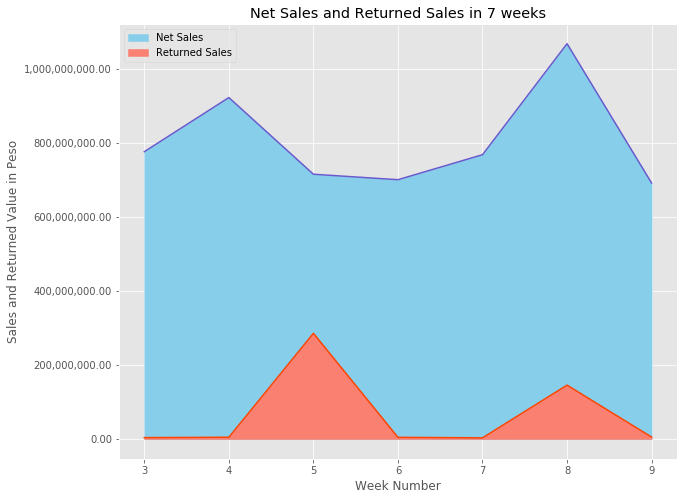

In [27]:
plt.figure(figsize=(10,8))

plt.fill_between(sales_return1['Week_Number'],sales_return1['This_week_net_sales'], color='skyblue', label='Net Sales')
plt.fill_between(sales_return2['Week_Number'],sales_return2['Next_week_returned_sales'],color='salmon', label='Returned Sales')
plt.plot('Week_Number','This_week_net_sales',data=sales_return1,color='Slateblue', label='_nolegend_')
plt.plot('Week_Number','Next_week_returned_sales',data=sales_return2, color='Orangered', label='_nolegend_')

plt.xlabel('Week Number')
plt.ylabel('Sales and Returned Value in Peso')
plt.legend()
from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.title('Net Sales and Returned Sales in 7 weeks')
plt.savefig('fig/5a.png',dpi=300, bbox_inches = "tight")

In [28]:
Week_Number1=mix_final.groupby(['Week_Number'])['This_week_sales_unit'].sum().reset_index()
Week_Number2=mix_final.groupby(['Week_Number'])['This_week_sales'].sum().reset_index()
Week_Number3=mix_final.groupby(['Week_Number'])['Next_week_returned_unit'].sum().reset_index()
Week_Number4=mix_final.groupby(['Week_Number'])['Next_week_return'].sum().reset_index()

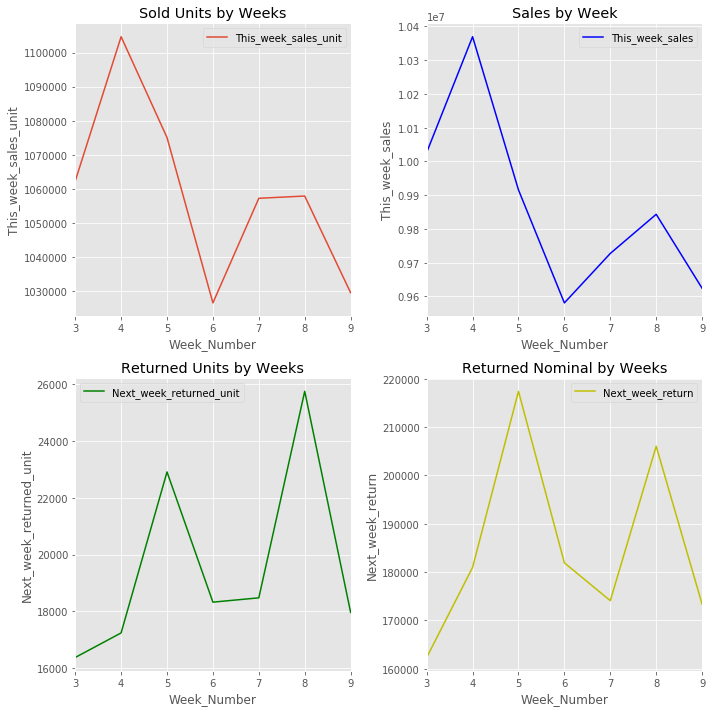

In [29]:
fig, ax = plt.subplots(2,2, figsize = (10,10),
#                        sharex=True,
#                        gridspec_kw= {"height_ratios": (0.2, 1)}
                      )

Week_Number1.plot(x='Week_Number', y='This_week_sales_unit', rot=0, kind='line', ax=ax[0,0])
ax[0,0].set_xlabel('Week_Number')
ax[0,0].set_ylabel('This_week_sales_unit')
ax[0,0].set_title('Sold Units by Weeks')

Week_Number2.plot(x='Week_Number', y='This_week_sales', rot=0, color='b', kind='line', ax=ax[0,1])
ax[0,1].set_xlabel('Week_Number')
ax[0,1].set_ylabel('This_week_sales')
ax[0,1].set_title('Sales by Week')

Week_Number3.plot(x='Week_Number', y='Next_week_returned_unit',color='g', rot=0, kind='line', ax=ax[1,0])
ax[1,0].set_xlabel('Week_Number')
ax[1,0].set_ylabel('Next_week_returned_unit')
ax[1,0].set_title('Returned Units by Weeks')

Week_Number4.plot(x='Week_Number', y='Next_week_return',color='y', rot=0, kind='line', ax=ax[1,1])
ax[1,1].set_xlabel('Week_Number')
ax[1,1].set_ylabel('Next_week_return')
ax[1,1].set_title('Returned Nominal by Weeks')

fig.tight_layout();

#### Target vs variabels from other table (town and state) bar plot

In [30]:
mix_town1=mix_final.groupby(['Town'])['Adjusted_demand_target'].sum().reset_index().sort_values(by='Adjusted_demand_target',ascending=False)
mix_town1['Town'] = mix_town1['Town'].str[5:]
mix_town2=mix_final.groupby(['Town'])['This_week_sales_unit'].sum().reset_index().sort_values(by='This_week_sales_unit',ascending=False)
mix_town2['Town'] = mix_town2['Town'].str[5:]
display(mix_town1.head(10))
mix_state1=mix_final.groupby(['State'])['Adjusted_demand_target'].sum().reset_index().sort_values(by='Adjusted_demand_target',ascending=False)
mix_state2=mix_final.groupby(['State'])['This_week_sales_unit'].sum().reset_index().sort_values(by='This_week_sales_unit',ascending=False)
display(mix_state1.head(10))

,Town,Adjusted_demand_target
7,AG. SAN ANTONIO,95283.00
8,AG. MEGA NAUCALPAN,85614.00
17,AG.IZTAPALAPA 2,60458.00
124,NORTE,50418.00
45,AG. CEYLAN,49194.00
85,AGUASCALIENTES NORTE,46610.00
12,AG. SANTA CLARA,45971.00
14,AG. XALOSTOC,41811.00
23,AG. TULTITLAN,40661.00
119,LEON MILENIUM,40417.00


,State,Adjusted_demand_target
9,ESTADO DE MÉXICO,652091.00
16,"MÉXICO, D.F.",583383.00
13,JALISCO,444446.00
18,NUEVO LEÓN,270556.00
10,GUANAJUATO,258343.00
20,PUEBLA,244448.00
30,VERACRUZ,242932.00
14,MICHOACÁN,191845.00
1,BAJA CALIFORNIA NORTE,149173.00
5,CHIHUAHUA,145061.00


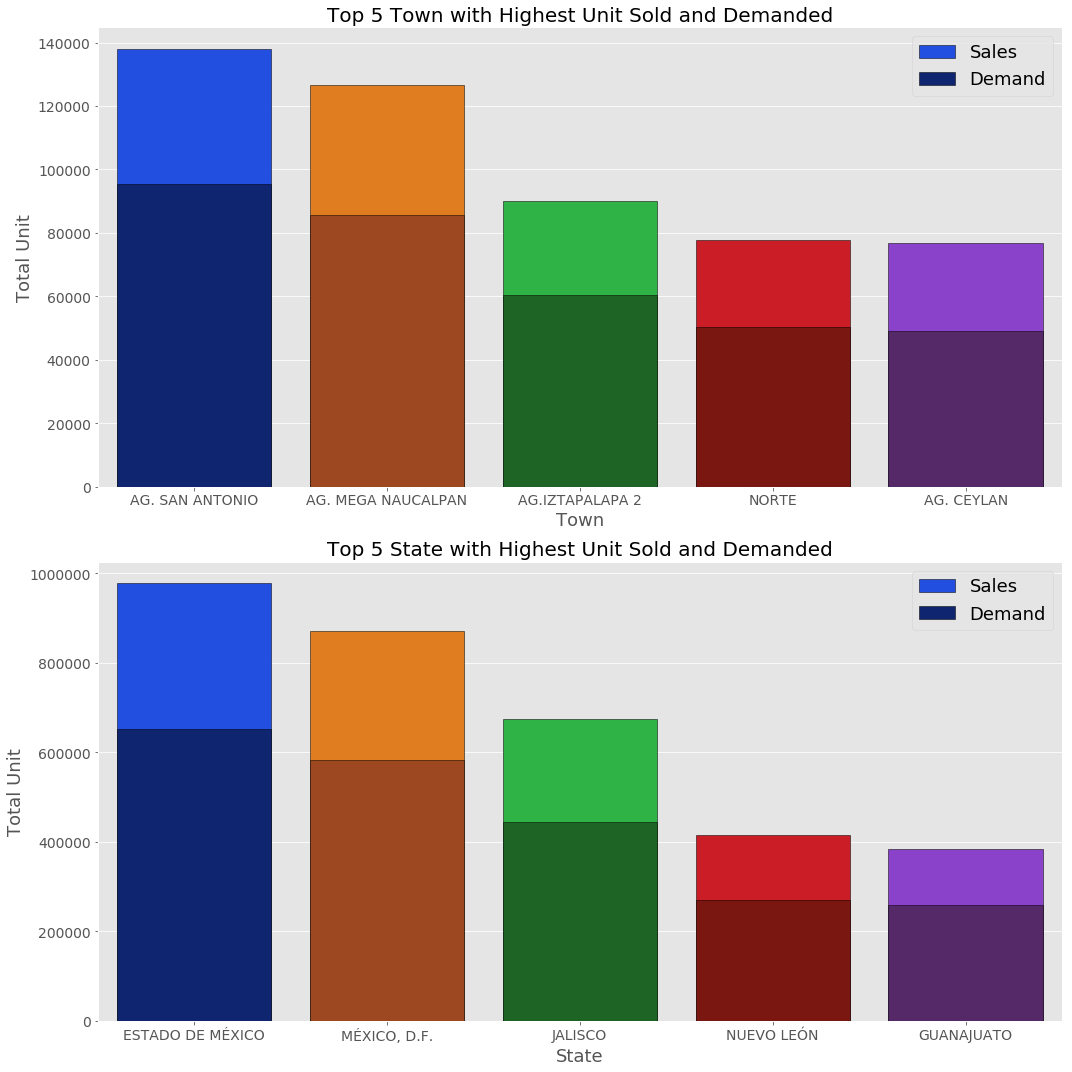

In [31]:
fig, ax = plt.subplots(2,1, figsize = (15,15),
#                        sharex=True,
#                        gridspec_kw= {"height_ratios": (0.2, 1)}
                      )

# train_town_state = pd.merge(train,town_state,how='left',on=['Agencia_ID'])

# train_town1=train_town_state.groupby(['Town'])['Adjusted_demand_target'].sum().reset_index()
#mix_town1.head(5).plot(x='Town', y='Adjusted_demand_target', kind='bar',ax=ax[0])
sns.barplot('Town','This_week_sales_unit', data=mix_town2.head(5),ax=ax[0], palette='bright', label='Sales', edgecolor='k')
sns.barplot('Town','Adjusted_demand_target', data=mix_town1.head(5),ax=ax[0], palette ='dark', label='Demand', edgecolor='k')
ax[0].tick_params(labelsize=14, rotation = 'default')
ax[0].set_xlabel('Town', fontsize=18)
ax[0].set_ylabel('Total Unit', fontsize=18)
ax[0].legend(prop={'size': 18})
ax[0].set_title('Top 5 Town with Highest Unit Sold and Demanded', fontsize=20)

# train_state1=train_town_state.groupby(['State'])['Adjusted_demand_target'].sum().reset_index()

#mix_state1.head(5).plot(x='State', y='Adjusted_demand_target', kind='bar',ax=ax[1])
sns.barplot('State','This_week_sales_unit', data=mix_state2.head(5),ax=ax[1], palette='bright', label='Sales', edgecolor='k')
sns.barplot('State','Adjusted_demand_target',data=mix_state1.head(5),ax=ax[1], palette ='dark', label='Demand', edgecolor='k')
ax[1].tick_params(labelsize=14, rotation = 'default')
ax[1].set_xlabel('State', fontsize=18)
ax[1].set_ylabel('Total Unit', fontsize=18)
ax[1].legend(prop={'size': 18})
ax[1].set_title('Top 5 State with Highest Unit Sold and Demanded', fontsize=20)

fig.tight_layout()
plt.savefig('fig/6.png', tight_box=True)

#### Target vs variabels from other table (Product Name) bar plot

In [32]:
mix_product1=mix_final.groupby(['Product_name'])['Adjusted_demand_target'].sum().reset_index().sort_values(by='Adjusted_demand_target',ascending=False)
mix_product2=mix_final.groupby(['Product_name'])['This_week_sales_unit'].sum().reset_index().sort_values(by='This_week_sales_unit',ascending=False)

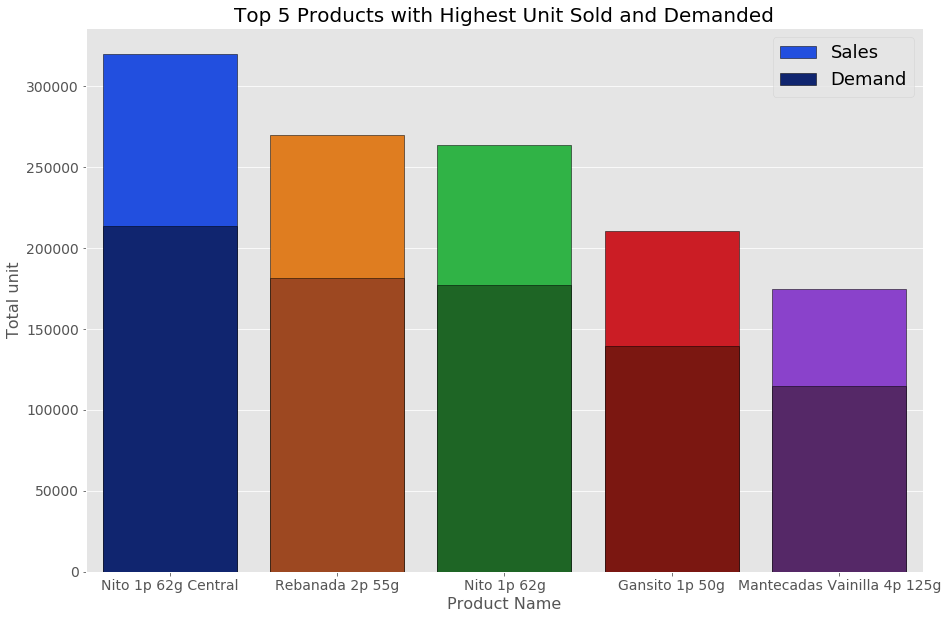

In [33]:
fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x='Product_name', y='This_week_sales_unit',data=mix_product2.head(5), ax=ax, palette='bright', label='Sales', edgecolor='k')
sns.barplot(x='Product_name', y='Adjusted_demand_target',data=mix_product1.head(5), ax=ax, palette='dark', label='Demand', edgecolor='k')

# plt.params(labelsize=16, rotation = 'default')
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Nito 1p 62g'

ax.set_xticklabels(('Nito 1p 62g Central','Rebanada 2p 55g','Nito 1p 62g','Gansito 1p 50g', 'Mantecadas Vainilla 4p 125g'))
ax.tick_params(labelsize=14, rotation='default')
plt.xlabel('Product Name', fontsize=16)
plt.ylabel('Total unit', fontsize=16)
plt.legend(prop={'size': 18})
plt.title('Top 5 Products with Highest Unit Sold and Demanded', fontsize=20)

plt.savefig('fig/6.png', tight_box=True)

#### Target vs Route ID bar plot

In [34]:
mix_route=mix_final.groupby(['Route_ID'])['Adjusted_demand_target'].sum().reset_index().sort_values(by='Adjusted_demand_target',ascending=False)
display(mix_route.head(10))

,Route_ID,Adjusted_demand_target
1912,6601,25868.00
1202,3001,25074.00
249,1101,24063.00
251,1103,23383.00
250,1102,23214.00
1913,6602,22978.00
252,1104,21973.00
1203,3002,21495.00
344,1201,20988.00
1914,6603,20729.00


<Figure size 720x432 with 0 Axes>

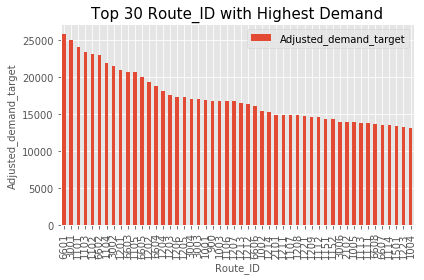

In [35]:
plt.figure(figsize=(10, 6))

mix_route.head(50).plot(x='Route_ID', y='Adjusted_demand_target', kind='bar')
# plt.params(labelsize=16, rotation = 'default')
plt.xlabel('Route_ID', fontsize=10)
plt.ylabel('Adjusted_demand_target', fontsize=10)
plt.title('Top 30 Route_ID with Highest Demand', fontsize=15)

plt.tight_layout()
plt.savefig('fig/6.png', tight_box=True)

# 3. Miscellaneous Handling

## 3.1. Check Missing Value

In [36]:
mix_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007846 entries, 0 to 1007845
Data columns (total 16 columns):
Agent_ID                   1007846 non-null int64
Channel_ID                 1007846 non-null int64
Client_ID                  1007846 non-null int64
Adjusted_demand_target     675261 non-null float64
Next_week_return           1007846 non-null float64
Next_week_returned_unit    1007846 non-null int64
Product_ID                 1007846 non-null int64
Route_ID                   1007846 non-null int64
Week_Number                1007846 non-null int64
This_week_sales            1007846 non-null float64
This_week_sales_unit       1007846 non-null int64
id                         332585 non-null float64
Client_name                1007846 non-null object
Product_name               1007846 non-null object
Town                       1007846 non-null object
State                      1007846 non-null object
dtypes: float64(4), int64(8), object(4)
memory usage: 130.7+ MB


##### No Missing Value

## 3.2. Check Duplicate Value

In [37]:
print('Number of duplicated data in train_final data:', mix_final.duplicated().sum())

Number of duplicated data in train_final data: 0


##### No Dyuplicate Value

# 4. Feature Engineering

## 4.1. Binning

### State

Tiga State pertama pada grafik sblmnya memiliki kesamaan yaitu berdekatan, oleh karena itu, dibuat variabel yang menggelompokkan State dengan fungsi sebagai berikut.

In [38]:
def is_near_mexico(x):
    if x['State']=='ESTADO DE MÉXICO':
        is_near_mexico=1
    elif x['State']=='MÉXICO, D.F.':
        is_near_mexico=1
    elif x['State']=='JALISCO':
        is_near_mexico=1
    else:
        is_near_mexico=0
    return is_near_mexico

mix_final['is_near_mexico']=mix_final.apply(lambda x:is_near_mexico(x),axis=1)

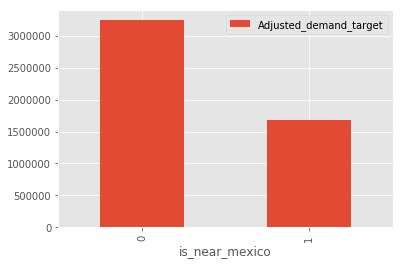

In [39]:
mix_state2=mix_final.groupby(['is_near_mexico'])['Adjusted_demand_target'].sum().reset_index().sort_values(by='Adjusted_demand_target',ascending=False)
mix_state2.plot(x='is_near_mexico', y='Adjusted_demand_target', kind='bar')

plt.savefig('fig/7.png', tight_box=True)

### Product ID

Tiga Product ID pertama pada grafik sblmnya dibuat menjadi satu kategori sebagai berikut.

In [40]:
# list_top_product=mix_product[mix_product['Adjusted_demand_target']>mix_product['Adjusted_demand_target'].mean()]['Product_ID']
# list_top_product=list_top_product.tolist()

In [41]:
# mix_final['is_top_product']=np.where(mix_final['Product_ID'].isin(list_top_product)==True,1,0)
# mix_final.sample(5)

### Route ID

Route ID diatas rata-rata pada grafik sblmnya dibuat menjadi satu kategori sebagai berikut.

In [42]:
# list_top_route=mix_route[mix_route['Adjusted_demand_target']>mix_route['Adjusted_demand_target'].mean()]['Route_ID']
# list_top_route=list_top_route.tolist()

In [43]:
# mix_final['is_top_route']=np.where(mix_final['Route_ID'].isin(list_top_route)==True,1,0)
# mix_final.sample(5)

## 4.2. Log Transformation

Dilakukan log tranformation

In [44]:
mix_final['log_Adjusted_demand_target']=(mix_final['Adjusted_demand_target']+1).transform(np.log)
mix_final['log_Next_week_return']=(mix_final['Next_week_return']+1).transform(np.log)
mix_final['log_Next_week_returned_unit']=(mix_final['Next_week_returned_unit']+1).transform(np.log)
mix_final['log_This_week_sales']=(mix_final['This_week_sales']+1).transform(np.log)
mix_final['log_This_week_sales_unit']=(mix_final['This_week_sales_unit']+1).transform(np.log)
mix_final.sample(5)

,Agent_ID,Channel_ID,Client_ID,Adjusted_demand_target,Next_week_return,Next_week_returned_unit,Product_ID,Route_ID,Week_Number,This_week_sales,...,Client_name,Product_name,Town,State,is_near_mexico,log_Adjusted_demand_target,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
604159,1347,1,4183483,5.00,0.00,0,1212,1173,5,41.90,...,NO IDENTIFICADO,Roles Canela 2p 120g BIM 1212,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,0,1.79,0.00,0.00,3.76,1.79
576251,1220,1,4671557,112.00,0.00,0,30572,2812,4,700.00,...,NO IDENTIFICADO,Barritas Fresa 67g Prom MTB MLA 30572,2048 AG. IXTAPALUCA 1,ESTADO DE MÉXICO,1,4.73,0.00,0.00,6.55,4.73
429228,1243,1,7126,2.00,0.00,0,32819,1110,6,17.78,...,LA ESTRELLA,Chocodonitas 6p 102g BIM 32819,2065 TOLUCA CENTRO,ESTADO DE MÉXICO,1,1.10,0.00,0.00,2.93,1.10
531404,2213,1,2392816,1.00,0.00,0,1242,1230,3,7.64,...,LUCHA,Donitas Espolvoreadas 6p 105g BIM 1242,2396 RUIZ CORTINEZ,TABASCO,0,0.69,0.00,0.00,2.16,0.69
753116,1911,1,1200591,nan,0.00,0,31467,2138,7,99.90,...,VERONICA ARREOLA PONCE,Principe Tubo 14p 152g SP MTB MLA 31467,2309 NORTE,JALISCO,1,nan,0.00,0.00,4.61,2.40


In [45]:
mix_final.describe()

,Agent_ID,Channel_ID,Client_ID,Adjusted_demand_target,Next_week_return,Next_week_returned_unit,Product_ID,Route_ID,Week_Number,This_week_sales,This_week_sales_unit,id,is_near_mexico,log_Adjusted_demand_target,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
count,1007846.00,1007846.00,1007846.00,675261.00,1007846.00,1007846.00,1007846.00,1007846.00,1007846.00,1007846.00,1007846.00,332585.00,1007846.00,675261.00,1007846.00,1007846.00,1007846.00,1007846.00
mean,2532.41,1.39,1792079.11,7.28,1.29,0.14,20839.86,2121.74,5.95,68.55,7.36,164995.12,0.34,1.61,0.10,0.04,3.52,1.63
std,4066.91,1.47,2719462.97,22.30,58.93,8.84,18661.42,1495.94,2.01,287.76,23.09,95258.36,0.47,0.84,0.57,0.24,0.97,0.82
min,1110.00,1.00,26.00,0.00,0.00,0.00,41.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1312.00,1.00,352457.00,2.00,0.00,0.00,1242.00,1161.00,4.00,16.76,2.00,82500.00,0.00,1.10,0.00,0.00,2.88,1.10
50%,1613.00,1.00,1180000.00,3.00,0.00,0.00,30549.00,1287.00,6.00,30.00,3.00,164976.00,0.00,1.39,0.00,0.00,3.43,1.39
75%,2036.00,1.00,2362677.00,6.00,0.00,0.00,37374.00,2803.00,8.00,56.28,7.00,247509.00,1.00,1.95,0.00,0.00,4.05,2.08
max,25759.00,11.00,2015152015.00,4380.00,51840.00,6768.00,49997.00,9962.00,9.00,36469.95,7200.00,329999.00,1.00,8.39,10.86,8.82,10.50,8.88


# 4.3. Outlier Handling

### 4.3.1 Target Variable

Target Variable boxplot after transformation

Text(0.5, 1.0, 'Boxplot of Log of Adjusted_demand_target')

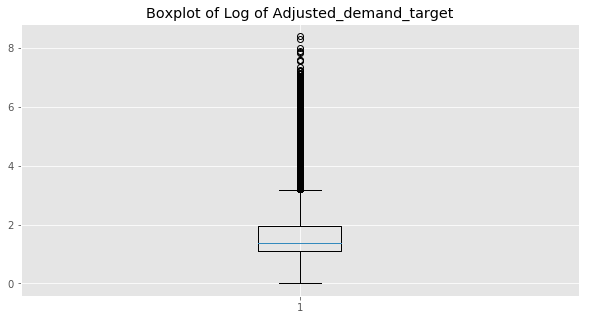

In [46]:
plt.figure(figsize=(10,5))
plt.boxplot(x = 'log_Adjusted_demand_target',data=mix_final[mix_final['log_Adjusted_demand_target'].notnull()])

plt.title('Boxplot of Log of Adjusted_demand_target')

### Drop row with outlier target value

In [47]:
#mix_final_2 = mix_final.copy()
upper_limit=mix_final['log_Adjusted_demand_target'].quantile(0.95)
#mix_final_2.loc[(mix_final_2['log_Adjusted_demand_target']>upper_limit),mix_final_2]=upper_limit
mix_final_2=mix_final[(mix_final['log_Adjusted_demand_target']<upper_limit) | ((mix_final['log_Adjusted_demand_target'].isnull()))]

### Shape of new dataset after dropping outlier

In [48]:
mix_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973506 entries, 0 to 1007845
Data columns (total 22 columns):
Agent_ID                       973506 non-null int64
Channel_ID                     973506 non-null int64
Client_ID                      973506 non-null int64
Adjusted_demand_target         640921 non-null float64
Next_week_return               973506 non-null float64
Next_week_returned_unit        973506 non-null int64
Product_ID                     973506 non-null int64
Route_ID                       973506 non-null int64
Week_Number                    973506 non-null int64
This_week_sales                973506 non-null float64
This_week_sales_unit           973506 non-null int64
id                             332585 non-null float64
Client_name                    973506 non-null object
Product_name                   973506 non-null object
Town                           973506 non-null object
State                          973506 non-null object
is_near_mexico              

In [49]:
mix_final_2.sample(5)

,Agent_ID,Channel_ID,Client_ID,Adjusted_demand_target,Next_week_return,Next_week_returned_unit,Product_ID,Route_ID,Week_Number,This_week_sales,...,Client_name,Product_name,Town,State,is_near_mexico,log_Adjusted_demand_target,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
512148,1111,1,4342419,3.00,0.00,0,46772,1008,9,26.76,...,NO IDENTIFICADO,Pan Molido 210g BIM 46772,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",1,1.39,0.00,0.00,3.32,1.39
430765,1223,1,166613,4.00,0.00,0,43065,4452,4,27.04,...,LA MORITA,Rollo Fresa 2p 75g MTA MLA 43065,2070 AG. XOCHIMILCO 1,"MÉXICO, D.F.",1,1.61,0.00,0.00,3.33,1.61
932573,2071,1,4509339,nan,0.00,0,37361,2855,9,6.25,...,NO IDENTIFICADO,Canelitas 120g Prom MTB MLA 37361,2296 IRAPUATO SAN MIGUELITO,GUANAJUATO,0,nan,0.00,0.00,1.98,0.69
936183,1631,1,6150068,nan,0.00,0,1250,1242,9,38.20,...,INGRID,Donas Azucar 4p 105g BIM 1250,2372 AG.TULANCINGO,HIDALGO,0,nan,0.00,0.00,3.67,1.79
600946,1311,1,150225,2.00,0.00,0,31471,2113,7,19.98,...,ISABEL GOMEZ,Triki Trakes Tubo 20p 174g SP MTB MLA 31471,2273 SAN PEDRO,JALISCO,1,1.10,0.00,0.00,3.04,1.10


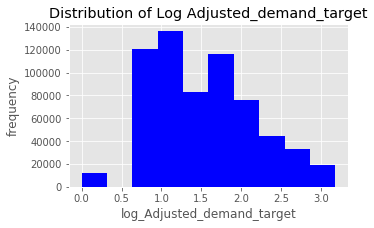

In [50]:
plt.figure(figsize=(5, 3))
plt.hist(x = 'log_Adjusted_demand_target', data=mix_final_2,bins=10,color='blue')

plt.title('Distribution of Log Adjusted_demand_target')
plt.xlabel('log_Adjusted_demand_target')
plt.ylabel('frequency')

plt.savefig('fig/8.png', tight_box=True)

### 4.3.2 Other Variables

Boxplot setelah dilogaritma masih banyak outlier

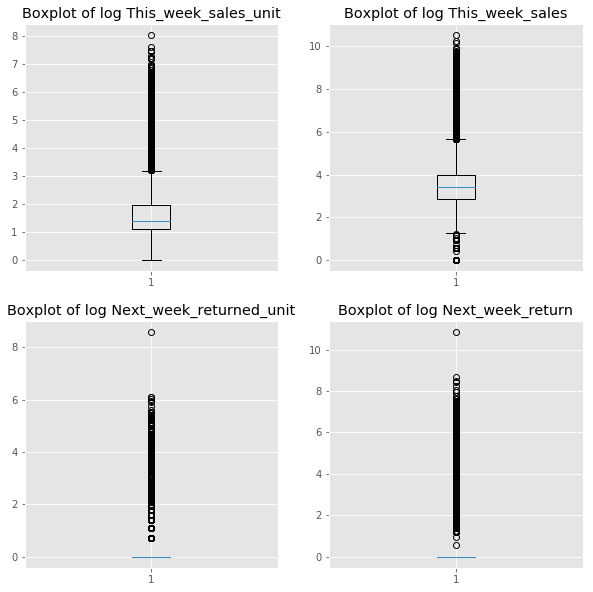

In [51]:
fig, ax = plt.subplots(2,2, figsize = (10,10),
#                        sharex=True,
#                        gridspec_kw= {"height_ratios": (0.2, 1)}
                      )

ax[0,0].boxplot(x = 'log_This_week_sales_unit',data=mix_final_2)
ax[0,0].set_title('Boxplot of log This_week_sales_unit')

ax[0,1].boxplot(x = 'log_This_week_sales',data=mix_final_2)
ax[0,1].set_title('Boxplot of log This_week_sales')

ax[1,0].boxplot(x = 'log_Next_week_returned_unit',data=mix_final_2)
ax[1,0].set_title('Boxplot of log Next_week_returned_unit')

ax[1,1].boxplot(x = 'log_Next_week_return',data=mix_final_2)
ax[1,1].set_title('Boxplot of log Next_week_return')

plt.savefig('fig/9a.png', tight_box=True)

In [52]:
#Fungsi pendeteksi Outlier
def outlier_detection(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    outlier = (x>upper_limit )|(x<lower_limit)
    return outlier

for i in ['log_This_week_sales_unit','log_This_week_sales','log_Next_week_returned_unit','log_Next_week_return']:
    print('Jumlah outlier pada variabel '+ str(i) + ' adalah '+ str(outlier_detection(mix_final_2[i]).sum()))

Jumlah outlier pada variabel log_This_week_sales_unit adalah 17227
Jumlah outlier pada variabel log_This_week_sales adalah 17327
Jumlah outlier pada variabel log_Next_week_returned_unit adalah 33028
Jumlah outlier pada variabel log_Next_week_return adalah 33028


Oleh karena jumlah outlier sedikit, outlier tersebut akan kita drop

In [53]:
def outlier_cap(x,data):
    q1 = data[x].quantile(0.25)
    q3 = data[x].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    #data = data[(data[x] < upper_limit) & (data[x] > lower_limit)]
    data.loc[(data[x]<lower_limit),x]=lower_limit
    data.loc[(data[x]>upper_limit),x]=upper_limit
    return data

for i in ['log_This_week_sales_unit','log_This_week_sales',
#           'log_Next_week_returned_unit',
#           'log_Next_week_return'
         ]:
    mix_final_3 = outlier_cap(i,mix_final_2)
for i in ['log_This_week_sales_unit','log_This_week_sales','log_Next_week_returned_unit','log_Next_week_return']:
    print('Jumlah outlier pada variabel '+ str(i) + ' adalah '+ str(outlier_detection(mix_final_3[i]).sum()))

Jumlah outlier pada variabel log_This_week_sales_unit adalah 0
Jumlah outlier pada variabel log_This_week_sales adalah 0
Jumlah outlier pada variabel log_Next_week_returned_unit adalah 33028
Jumlah outlier pada variabel log_Next_week_return adalah 33028


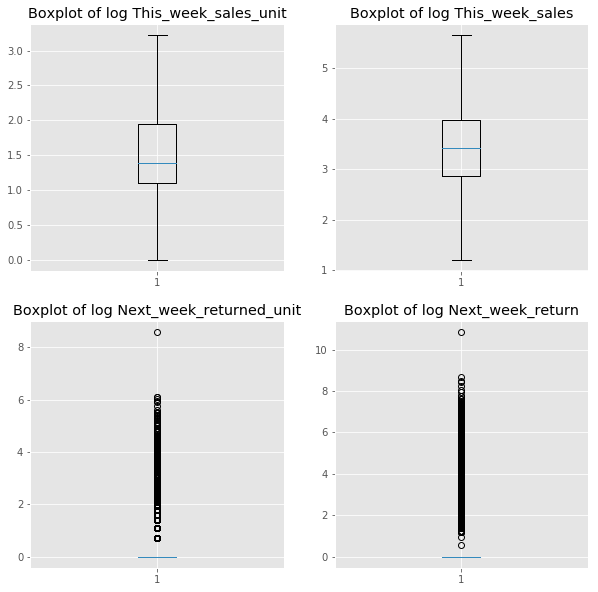

In [54]:
fig, ax = plt.subplots(2,2, figsize = (10,10),
#                        sharex=True,
#                        gridspec_kw= {"height_ratios": (0.2, 1)}
                      )

ax[0,0].boxplot(x = 'log_This_week_sales_unit',data=mix_final_3)
ax[0,0].set_title('Boxplot of log This_week_sales_unit')

ax[0,1].boxplot(x = 'log_This_week_sales',data=mix_final_3)
ax[0,1].set_title('Boxplot of log This_week_sales')

ax[1,0].boxplot(x = 'log_Next_week_returned_unit',data=mix_final_3)
ax[1,0].set_title('Boxplot of log Next_week_returned_unit')

ax[1,1].boxplot(x = 'log_Next_week_return',data=mix_final_3)
ax[1,1].set_title('Boxplot of log Next_week_return')

plt.savefig('fig/10.png', tight_box=True)

In [55]:
mix_final_3.describe()

,Agent_ID,Channel_ID,Client_ID,Adjusted_demand_target,Next_week_return,Next_week_returned_unit,Product_ID,Route_ID,Week_Number,This_week_sales,This_week_sales_unit,id,is_near_mexico,log_Adjusted_demand_target,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
count,973506.00,973506.00,973506.00,640921.00,973506.00,973506.00,973506.00,973506.00,973506.00,973506.00,973506.00,332585.00,973506.00,640921.00,973506.00,973506.00,973506.00,973506.00
mean,2533.63,1.36,1793807.58,4.60,1.15,0.12,20693.26,2106.05,5.95,51.39,5.57,164995.12,0.34,1.49,0.10,0.04,3.45,1.54
std,4073.03,1.43,2744638.49,4.32,55.58,5.79,18654.65,1475.06,2.01,173.56,12.81,95258.36,0.47,0.67,0.56,0.24,0.83,0.68
min,1110.00,1.00,26.00,0.00,0.00,0.00,41.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.20,0.00
25%,1311.00,1.00,353454.50,2.00,0.00,0.00,1242.00,1161.00,4.00,16.67,2.00,82500.00,0.00,1.10,0.00,0.00,2.87,1.10
50%,1613.00,1.00,1180858.00,3.00,0.00,0.00,30532.00,1283.00,6.00,29.49,3.00,164976.00,0.00,1.39,0.00,0.00,3.42,1.39
75%,2034.00,1.00,2364219.50,6.00,0.00,0.00,37361.00,2802.00,8.00,52.80,6.00,247509.00,1.00,1.95,0.00,0.00,3.99,1.95
max,25759.00,11.00,2015152015.00,23.00,51840.00,5400.00,49997.00,9917.00,9.00,36469.95,3000.00,329999.00,1.00,3.18,10.86,8.59,5.66,3.22


## 4.4. Dropping Variables

Drop variabel lama yang telah ditransformasi dan scalling serta drop 'town' dan 'state' karena diubah menjadi 'is_near_mexico' serta variabel 'Agencia_ID', 'Producto_ID', dan 'Cliente_ID' yang telah direplace dengan 'NombreCliente' dan 'NombreProducto'

In [56]:
#sebelum dropping
mix_final_3.head()

,Agent_ID,Channel_ID,Client_ID,Adjusted_demand_target,Next_week_return,Next_week_returned_unit,Product_ID,Route_ID,Week_Number,This_week_sales,...,Client_name,Product_name,Town,State,is_near_mexico,log_Adjusted_demand_target,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
0,1656,1,1446836,4.00,0.00,0,41938,1219,3,39.64,...,MARY PAZ,Mantecadas Nuez 123g BIM 41938,2407 TEPEACA,PUEBLA,0,1.61,0.00,0.00,3.70,1.61
1,4013,4,62969,13.00,0.00,0,43118,4912,8,132.73,...,OXXO LIBRAMIENTO,Mantecadas Nuez 123g MTA BIM 43118,2479 SANTA CATARINA BIMBO,NUEVO LEÓN,0,2.64,0.00,0.00,4.90,2.64
2,1914,1,2098200,3.00,0.00,0,1250,1107,3,22.92,...,PEDRO MELENDREZ MENDOZA,Donas Azucar 4p 105g BIM 1250,2293 GRANJAS MARINELA,JALISCO,1,1.39,0.00,0.00,3.17,1.39
3,1470,1,1525315,3.00,0.00,0,43316,2014,7,24.45,...,MINI SUPER MARTELL,Submarinos Vainilla 3p 105g SP MTA MLA 43316,2515 CAVAZOS,NUEVO LEÓN,0,1.39,0.00,0.00,3.24,1.39
4,2034,1,2239746,3.00,0.00,0,1212,1288,6,25.14,...,VINOS Y LICORES PEPITO,Roles Canela 2p 120g BIM 1212,2167 MORELIA LA HUERTA,MICHOACÁN,0,1.39,0.00,0.00,3.26,1.39


In [57]:
mix_final_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973506 entries, 0 to 1007845
Data columns (total 22 columns):
Agent_ID                       973506 non-null int64
Channel_ID                     973506 non-null int64
Client_ID                      973506 non-null int64
Adjusted_demand_target         640921 non-null float64
Next_week_return               973506 non-null float64
Next_week_returned_unit        973506 non-null int64
Product_ID                     973506 non-null int64
Route_ID                       973506 non-null int64
Week_Number                    973506 non-null int64
This_week_sales                973506 non-null float64
This_week_sales_unit           973506 non-null int64
id                             332585 non-null float64
Client_name                    973506 non-null object
Product_name                   973506 non-null object
Town                           973506 non-null object
State                          973506 non-null object
is_near_mexico              

In [58]:
mix_final_3.columns

Index(['Agent_ID', 'Channel_ID', 'Client_ID', 'Adjusted_demand_target',
       'Next_week_return', 'Next_week_returned_unit', 'Product_ID', 'Route_ID',
       'Week_Number', 'This_week_sales', 'This_week_sales_unit', 'id',
       'Client_name', 'Product_name', 'Town', 'State', 'is_near_mexico',
       'log_Adjusted_demand_target', 'log_Next_week_return',
       'log_Next_week_returned_unit', 'log_This_week_sales',
       'log_This_week_sales_unit'],
      dtype='object')

In [59]:
#Sesudah dropping
mix_final_drop=mix_final_3.drop([
       'Next_week_return', 'Next_week_returned_unit',
        'This_week_sales', 'This_week_sales_unit',
       'Client_name', 'Product_name', 'Town', 'State'],1)
mix_final_drop.sample(10)

,Agent_ID,Channel_ID,Client_ID,Adjusted_demand_target,Product_ID,Route_ID,Week_Number,id,is_near_mexico,log_Adjusted_demand_target,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
655478,1620,1,985026,6.00,1125,1248,3,nan,0,1.95,0.00,0.00,4.07,1.95
58585,1237,1,915087,6.00,1232,1157,3,nan,0,1.95,0.00,0.00,4.70,1.95
63902,2034,1,4584410,6.00,2425,1296,6,nan,0,1.95,0.00,0.00,3.33,1.95
144973,1491,4,2243195,8.00,43338,6626,3,nan,0,2.20,0.00,0.00,5.13,2.20
585176,1347,1,862384,2.00,1238,1272,4,nan,0,1.10,0.00,0.00,3.03,1.10
276616,2016,1,183863,1.00,1146,1066,9,nan,0,0.69,0.00,0.00,3.11,0.69
95784,4037,1,1435827,1.00,43210,1163,8,nan,0,0.69,0.00,0.00,2.05,0.69
276765,1126,1,594767,4.00,1250,1431,7,nan,1,1.61,0.00,0.00,3.45,1.61
71039,1470,1,1512309,7.00,43200,1140,8,nan,0,2.08,0.00,0.00,4.86,2.08
564831,2215,1,4636234,2.00,1240,4503,6,nan,0,1.10,0.00,0.00,2.88,1.10


## Recheck for Missing Values and Duplicate Values check

In [60]:
mix_final_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973506 entries, 0 to 1007845
Data columns (total 14 columns):
Agent_ID                       973506 non-null int64
Channel_ID                     973506 non-null int64
Client_ID                      973506 non-null int64
Adjusted_demand_target         640921 non-null float64
Product_ID                     973506 non-null int64
Route_ID                       973506 non-null int64
Week_Number                    973506 non-null int64
id                             332585 non-null float64
is_near_mexico                 973506 non-null int64
log_Adjusted_demand_target     640921 non-null float64
log_Next_week_return           973506 non-null float64
log_Next_week_returned_unit    973506 non-null float64
log_This_week_sales            973506 non-null float64
log_This_week_sales_unit       973506 non-null float64
dtypes: float64(7), int64(7)
memory usage: 111.4 MB


In [61]:
print('Number of duplicated data in train_final_drop data:', mix_final_drop.duplicated().sum())

Number of duplicated data in train_final_drop data: 7323


Terdapat 6735duplicate data yang tiba-tiba muncul. Mari kita lihat darimana asal duplikat data tersebut

In [62]:
cliente.nunique()

Cliente_ID       930500
NombreCliente    311155
dtype: int64

In [63]:
producto.nunique()

Producto_ID       2592
NombreProducto    2592
dtype: int64

In [64]:
town_state.nunique()

Agencia_ID    790
Town          260
State          33
dtype: int64

Sepertinya data 'cliente' memiliki nama klien yang sama dengan lebih dari 1 ID. Setelah dilakukan penggantian 'cliente_id' dengan 'NombreCliente', menyebabkan munculnya beberapa row yang duplikat.

In [65]:
mix_final_drop = mix_final_drop.drop_duplicates()
print('Number of duplicated data in mix_final_drop data', mix_final_drop.duplicated().sum())

Number of duplicated data in mix_final_drop data 0


In [66]:
mix_final_drop.sample(5)

,Agent_ID,Channel_ID,Client_ID,Adjusted_demand_target,Product_ID,Route_ID,Week_Number,id,is_near_mexico,log_Adjusted_demand_target,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
566720,2653,1,2222621,5.00,1125,1040,4,nan,0,1.79,0.00,0.00,3.89,1.79
890417,2013,1,1618526,nan,31507,2813,6,213475.00,1,nan,0.00,0.00,1.98,0.69
670520,1159,4,2195921,5.00,632,6604,9,nan,1,1.79,0.00,0.00,4.40,1.79
419881,1335,1,819969,2.00,43058,2155,5,nan,0,1.10,0.00,0.00,2.98,1.10
34280,1420,1,1873696,2.00,35309,2138,8,nan,0,1.10,0.00,0.00,2.60,1.10


# 5. Data Splitting

In [67]:
test_reg = test.copy()

test_reg.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,id
0,7,1130,1,1611,322306,35452,5,22.20,0,0.00,0
1,4,1350,1,2829,4489341,40680,2,13.72,0,0.00,1
2,6,1555,1,2815,2462099,43274,6,35.58,0,0.00,2
3,5,1439,1,2813,1096415,30572,8,50.00,0,0.00,3
4,9,2024,1,2116,5903035,35309,15,93.75,0,0.00,4


In [68]:
test_reg_final = pd.merge(test_reg,town_state,how='left',on=['Agencia_ID'])

In [69]:
def is_near_mexico(x):
    if x['State']=='ESTADO DE MÉXICO':
        is_near_mexico=1
    elif x['State']=='MÉXICO, D.F.':
        is_near_mexico=1
    elif x['State']=='JALISCO':
        is_near_mexico=1
    else:
        is_near_mexico=0
    return is_near_mexico

test_reg_final['is_near_mexico']=test_reg_final.apply(lambda x:is_near_mexico(x),axis=1)

In [70]:
test_reg_final.sample(5)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,id,Town,State,is_near_mexico
207498,7,1622,1,1060,4370181,1109,3,45.03,0,0.00,207498,2375 VERACRUZ NORTE,VERACRUZ,0
217003,4,1387,1,2003,463709,43084,2,16.30,0,0.00,217003,2272 SAN LUIS REY,SAN LUIS POTOSÍ,0
302005,4,1552,1,2108,431365,43058,4,40.00,0,0.00,302005,2574 TIJUANA PACIFICO,BAJA CALIFORNIA NORTE,0
299933,4,2015,1,2836,919032,35516,5,27.30,0,0.00,299933,2154 ATLACOMULCO,ESTADO DE MÉXICO,1
44199,6,1119,1,1462,2494327,972,2,37.96,0,0.00,44199,2013 AG. MEGA NAUCALPAN,ESTADO DE MÉXICO,1


In [71]:
new_columns = ['Week_Number','Agent_ID','Channel_ID','Route_ID','Client_ID','Product_ID',
               'This_week_sales_unit','This_week_sales','Next_week_returned_unit','Next_week_return',
               'id','Town','State','is_near_mexico']
test_reg_final.columns = new_columns

In [72]:
test_reg_final['log_Next_week_return']=(test_reg_final['Next_week_return']+1).transform(np.log)
test_reg_final['log_Next_week_returned_unit']=(test_reg_final['Next_week_returned_unit']+1).transform(np.log)
test_reg_final['log_This_week_sales']=(test_reg_final['This_week_sales']+1).transform(np.log)
test_reg_final['log_This_week_sales_unit']=(test_reg_final['This_week_sales_unit']+1).transform(np.log)

In [73]:
test_reg_final.sample(5)

,Week_Number,Agent_ID,Channel_ID,Route_ID,Client_ID,Product_ID,This_week_sales_unit,This_week_sales,Next_week_returned_unit,Next_week_return,id,Town,State,is_near_mexico,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
202960,9,1127,1,2149,425239,36746,6,69.18,0,0.00,202960,2003 AG. COACALCO,ESTADO DE MÉXICO,1,0.00,0.00,4.25,1.95
148005,6,2022,1,1207,2021969,4767,2,29.58,0,0.00,148005,2152 ALTAMIRANO_BM,GUERRERO,0,0.00,0.00,3.42,1.10
63287,4,1112,1,1605,688088,35452,5,22.20,0,0.00,63287,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,1,0.00,0.00,3.14,1.79
204255,6,1387,1,1014,1225344,2233,5,99.70,0,0.00,204255,2272 SAN LUIS REY,SAN LUIS POTOSÍ,0,0.00,0.00,4.61,1.79
240378,9,1367,4,6606,1097467,1150,6,88.20,0,0.00,240378,2293 GRANJAS MARINELA,JALISCO,1,0.00,0.00,4.49,1.95


In [74]:
test_reg_final_drop=test_reg_final.drop([
       'This_week_sales_unit', 'This_week_sales', 'Next_week_return', 'Next_week_returned_unit',
       'Town', 'State'],1)
test_reg_final_drop.head(10)

,Week_Number,Agent_ID,Channel_ID,Route_ID,Client_ID,Product_ID,id,is_near_mexico,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
0,7,1130,1,1611,322306,35452,0,1,0.00,0.00,3.14,1.79
1,4,1350,1,2829,4489341,40680,1,0,0.00,0.00,2.69,1.10
2,6,1555,1,2815,2462099,43274,2,0,0.00,0.00,3.60,1.95
3,5,1439,1,2813,1096415,30572,3,0,0.00,0.00,3.93,2.20
4,9,2024,1,2116,5903035,35309,4,0,0.00,0.00,4.55,2.77
5,3,1445,1,2125,1208272,30569,5,0,0.00,0.00,3.77,1.95
6,4,2040,1,2110,2219565,30532,6,0,0.00,0.00,4.37,2.40
7,8,3221,1,1615,57195,4245,7,1,0.00,0.00,3.09,1.10
8,7,1118,1,1404,73271,1220,8,1,0.00,0.00,2.16,0.69
9,3,3216,1,1650,4656827,323,9,0,0.00,0.00,2.85,1.10


In [75]:
test_reg_final_drop.columns

Index(['Week_Number', 'Agent_ID', 'Channel_ID', 'Route_ID', 'Client_ID',
       'Product_ID', 'id', 'is_near_mexico', 'log_Next_week_return',
       'log_Next_week_returned_unit', 'log_This_week_sales',
       'log_This_week_sales_unit'],
      dtype='object')

In [76]:
mix_final_drop.columns=['Agent_ID', 'Channel_ID', 'Client_ID', 'Adjusted_demand_target',
       'Product_ID', 'Route_ID', 'Week_Number', 'id', 'is_near_mexico',
       'log_Adjusted_demand_target', 'log_Next_week_return',
       'log_Next_week_returned_unit', 'log_This_week_sales',
       'log_This_week_sales_unit']
mix_final_drop=mix_final_drop.reindex(columns=['Week_Number','Agent_ID', 'Channel_ID', 'Route_ID','Client_ID',  
       'Product_ID', 'id', 'is_near_mexico','log_Next_week_return',
       'log_Next_week_returned_unit', 'log_This_week_sales',
       'log_This_week_sales_unit', 'Adjusted_demand_target','log_Adjusted_demand_target',])

In [77]:
mix_final_drop.head()

,Week_Number,Agent_ID,Channel_ID,Route_ID,Client_ID,Product_ID,id,is_near_mexico,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit,Adjusted_demand_target,log_Adjusted_demand_target
0,3,1656,1,1219,1446836,41938,nan,0,0.00,0.00,3.70,1.61,4.00,1.61
1,8,4013,4,4912,62969,43118,nan,0,0.00,0.00,4.90,2.64,13.00,2.64
2,3,1914,1,1107,2098200,1250,nan,1,0.00,0.00,3.17,1.39,3.00,1.39
3,7,1470,1,2014,1525315,43316,nan,0,0.00,0.00,3.24,1.39,3.00,1.39
4,6,2034,1,1288,2239746,1212,nan,0,0.00,0.00,3.26,1.39,3.00,1.39


In [78]:
X=mix_final_drop.drop(['Adjusted_demand_target','log_Adjusted_demand_target'],1)
Y=mix_final_drop[['Adjusted_demand_target','log_Adjusted_demand_target']]
display(X.shape)
display(Y.shape)

(966183, 12)

(966183, 2)

In [79]:
X_train = X[~Y['log_Adjusted_demand_target'].isnull()]
X_validation = test_reg_final_drop
Y_train = Y[~Y['log_Adjusted_demand_target'].isnull()]
display(X_train.shape)
display(X_validation.shape)
display(Y_train.shape)

(636183, 12)

(330000, 12)

(636183, 2)

In [80]:
X_train=X_train.drop(['id'],1)
X_validation=X_validation.drop(['id'],1)

In [81]:
X_train.columns

Index(['Week_Number', 'Agent_ID', 'Channel_ID', 'Route_ID', 'Client_ID',
       'Product_ID', 'is_near_mexico', 'log_Next_week_return',
       'log_Next_week_returned_unit', 'log_This_week_sales',
       'log_This_week_sales_unit'],
      dtype='object')

In [82]:
X_validation.head(5)

,Week_Number,Agent_ID,Channel_ID,Route_ID,Client_ID,Product_ID,is_near_mexico,log_Next_week_return,log_Next_week_returned_unit,log_This_week_sales,log_This_week_sales_unit
0,7,1130,1,1611,322306,35452,1,0.00,0.00,3.14,1.79
1,4,1350,1,2829,4489341,40680,0,0.00,0.00,2.69,1.10
2,6,1555,1,2815,2462099,43274,0,0.00,0.00,3.60,1.95
3,5,1439,1,2813,1096415,30572,0,0.00,0.00,3.93,2.20
4,9,2024,1,2116,5903035,35309,0,0.00,0.00,4.55,2.77


In [83]:
Y_train.sample(5)

,Adjusted_demand_target,log_Adjusted_demand_target
65775,5.00,1.79
482163,20.00,3.04
534087,3.00,1.39
567414,1.00,0.69
462882,10.00,2.40


We split the training data in 70:30 ratio between train and test data

In [84]:
X_train_reg = np.array(X_train)
X_validation_reg = np.array(X_validation)
Y_train_reg=Y_train

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_train_reg,Y_train_reg,stratify=Y_train_reg,test_size = 0.3,random_state = 123)

In [86]:
print('Size of xtrain :',xtrain.shape)
print('Size of ytrain :',ytrain.shape)

Size of xtrain : (445328, 11)
Size of ytrain : (445328, 2)


# Multiple Regression

## Feature Selection

Feature: 0, Score: 0.00003
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00133
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00118
Feature: 7, Score: -0.08327
Feature: 8, Score: -0.32158
Feature: 9, Score: -0.00562
Feature: 10, Score: 1.00210


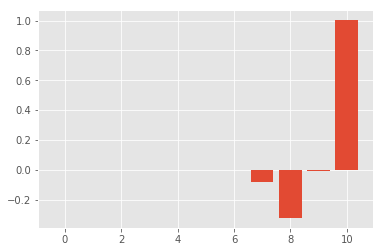

<Figure size 432x288 with 0 Axes>

In [87]:
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(xtrain, ytrain['log_Adjusted_demand_target'])
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

plt.savefig('fig/10.png', tight_box=True)

Hanya empat variabel terakhir yang terlihat signifikan untuk digunakan dalam model, sehingga hanya dipilih 4 variabel tersebut.

In [88]:
X_train_reg_2=X_train_reg[:,-4:]
X_validation_reg_2=X_validation_reg[:,-4:]

In [89]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_train_reg_2,Y_train_reg,stratify=Y_train_reg,test_size = 0.3,random_state = 123)

In [90]:
print('Size of xtrain :',xtrain.shape)
print('Size of ytrain :',ytrain.shape)

Size of xtrain : (445328, 4)
Size of ytrain : (445328, 2)


## Modeling

In [91]:
from sklearn.linear_model import LinearRegression 
regressor_multi = LinearRegression()
regressor_multi.fit(xtrain, ytrain['log_Adjusted_demand_target'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
pred_multi = regressor_multi.predict(xtest)
pred_multi_log = np.exp(pred_multi) - 1

In [93]:
print('Coefficients: \n', regressor_multi.coef_)

print('Intercept: \n', regressor_multi.intercept_)

from sklearn.metrics import r2_score
print('Variance score before log: %.2f' % r2_score(ytest['log_Adjusted_demand_target'], pred_multi))

from sklearn.metrics import mean_squared_error
print("Mean squared error before log: %.2f" % mean_squared_error(ytest['log_Adjusted_demand_target'], pred_multi))

from sklearn.metrics import r2_score
print('Variance score after log: %.2f' % r2_score(ytest['Adjusted_demand_target'], pred_multi_log))

from sklearn.metrics import mean_squared_error
print("Mean squared error after log: %.2f" % mean_squared_error(ytest['Adjusted_demand_target'], pred_multi_log))

from sklearn.metrics import mean_squared_error
print("Root Mean squared error after log: %.2f" % np.sqrt(mean_squared_error(ytest['Adjusted_demand_target'], pred_multi_log)))

Coefficients: 
 [-0.08347195 -0.3209732  -0.00539611  1.00224266]
Intercept: 
 0.015069848022704946
Variance score before log: 0.99
Mean squared error before log: 0.01
Variance score after log: 0.99
Mean squared error after log: 0.11
Root Mean squared error after log: 0.33


# Ridge

In [94]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [95]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]
for a in alphas:
 model = Ridge(alpha=a, normalize=True).fit(xtrain, ytrain['log_Adjusted_demand_target'])
 score = model.score(xtrain, ytrain['log_Adjusted_demand_target'])
 pred_y = model.predict(xtest)
 pred_y_log = np.exp(pred_y) - 1
 mse = mean_squared_error(ytest['log_Adjusted_demand_target'], pred_y) 
 mse_log = mean_squared_error(ytest['Adjusted_demand_target'], pred_y_log)
 print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}, MSE_afterlog:{4:.2f}, RMSE_afterlog:{5:.2f}"
    .format(a, score, mse, np.sqrt(mse), mse_log, np.sqrt(mse_log)))

Alpha:0.000001, R2:0.986, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33
Alpha:0.000010, R2:0.986, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33
Alpha:0.000100, R2:0.986, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33
Alpha:0.001000, R2:0.986, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33
Alpha:0.010000, R2:0.985, MSE:0.01, RMSE:0.08, MSE_afterlog:0.12, RMSE_afterlog:0.35
Alpha:0.100000, R2:0.972, MSE:0.01, RMSE:0.11, MSE_afterlog:0.67, RMSE_afterlog:0.82
Alpha:0.500000, R2:0.901, MSE:0.04, RMSE:0.21, MSE_afterlog:3.43, RMSE_afterlog:1.85
Alpha:1.000000, R2:0.818, MSE:0.08, RMSE:0.28, MSE_afterlog:6.09, RMSE_afterlog:2.47


In [96]:
ridge_mod=Ridge(alpha=1, normalize=True).fit(xtrain,ytrain['log_Adjusted_demand_target'])
ypred = ridge_mod.predict(xtest)
ypred_log = np.exp(ypred) - 1
score = ridge_mod.score(xtest,ytest['log_Adjusted_demand_target'])
mse = mean_squared_error(ytest['log_Adjusted_demand_target'], ypred) 
mse_log = mean_squared_error(ytest['Adjusted_demand_target'], ypred_log)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}, MSE_afterlog:{3:.2f}, RMSE_afterlog:{4:.2f}"
   .format(score, mse,np.sqrt(mse), mse_log, np.sqrt(mse_log)))

R2:0.819, MSE:0.08, RMSE:0.28, MSE_afterlog:6.09, RMSE_afterlog:2.47


In [97]:
ridge_cv=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(xtrain,ytrain['log_Adjusted_demand_target'])
print(ridge_mod.alpha_)
print(np.mean(ridge_mod.cv_values_, axis=0))

1.0
[0.00638763 0.00638763 0.00638763 0.00638763 0.00638763 0.00638763
 0.00638763 0.00638763]


In [98]:
ypred = ridge_cv.predict(xtest)
ypred_log = np.exp(ypred) - 1
score = ridge_cv.score(xtest,ytest['log_Adjusted_demand_target'])
mse = mean_squared_error(ytest['log_Adjusted_demand_target'], ypred) 
mse_log = mean_squared_error(ytest['Adjusted_demand_target'], ypred_log)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}, MSE_afterlog:{3:.2f}, RMSE_afterlog:{4:.2f}"
   .format(score, mse,np.sqrt(mse), mse_log, np.sqrt(mse_log)))

R2:0.986, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33


# Lasso Regression

In [99]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [100]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = Lasso(alpha=a).fit(xtrain, ytrain['log_Adjusted_demand_target'])  
    score = model.score(xtrain, ytrain['log_Adjusted_demand_target'])  
    pred_y = model.predict(xtest)
    pred_y_log = np.exp(pred_y) - 1
    mse = mean_squared_error(ytest['log_Adjusted_demand_target'], pred_y) 
    mse_log = mean_squared_error(ytest['Adjusted_demand_target'], pred_y_log)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}, MSE_afterlog:{4:.2f}, RMSE_afterlog:{5:.2f}"
    .format(a, score, mse, np.sqrt(mse), mse_log, np.sqrt(mse_log)))

Alpha:0.0001, R2:0.99, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33
Alpha:0.0010, R2:0.99, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33
Alpha:0.0100, R2:0.98, MSE:0.01, RMSE:0.09, MSE_afterlog:0.15, RMSE_afterlog:0.39
Alpha:0.1000, R2:0.90, MSE:0.04, RMSE:0.21, MSE_afterlog:2.76, RMSE_afterlog:1.66
Alpha:0.3000, R2:0.46, MSE:0.24, RMSE:0.49, MSE_afterlog:13.32, RMSE_afterlog:3.65
Alpha:0.5000, R2:0.00, MSE:0.44, RMSE:0.67, MSE_afterlog:19.91, RMSE_afterlog:4.46
Alpha:0.7000, R2:0.00, MSE:0.44, RMSE:0.67, MSE_afterlog:19.91, RMSE_afterlog:4.46
Alpha:1.0000, R2:0.00, MSE:0.44, RMSE:0.67, MSE_afterlog:19.91, RMSE_afterlog:4.46


In [101]:
lasso=Lasso(alpha=0.1).fit(xtrain, ytrain['log_Adjusted_demand_target'])
ypred = lasso.predict(xtest)
ypred_log = np.exp(ypred) - 1
score = lasso.score(xtest,ytest['log_Adjusted_demand_target'])
mse = mean_squared_error(ytest['log_Adjusted_demand_target'], ypred) 
mse_log = mean_squared_error(ytest['Adjusted_demand_target'], ypred_log)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}, MSE_afterlog:{3:.2f}, RMSE_afterlog:{4:.2f}"
   .format(score, mse,np.sqrt(mse), mse_log, np.sqrt(mse_log)))

R2:0.899, MSE:0.04, RMSE:0.21, MSE_afterlog:2.76, RMSE_afterlog:1.66


In [102]:
lassocv = LassoCV(alphas=alphas, cv=5).fit(xtrain,ytrain['log_Adjusted_demand_target'])
print(lassocv)
ypred = lassocv.predict(xtest)
ypred_log = np.exp(ypred) - 1
score = lasso.score(xtest,ytest['log_Adjusted_demand_target'])
mse = mean_squared_error(ytest['log_Adjusted_demand_target'], ypred) 
mse_log = mean_squared_error(ytest['Adjusted_demand_target'], ypred_log)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}, MSE_afterlog:{3:.2f}, RMSE_afterlog:{4:.2f}"
   .format(score, mse,np.sqrt(mse), mse_log, np.sqrt(mse_log)))

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1], copy_X=True,
    cv=5, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)
R2:0.899, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33


# Elastic Net Regesion

In [103]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [104]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(xtrain, ytrain['log_Adjusted_demand_target'])  
    score = model.score(xtrain, ytrain['log_Adjusted_demand_target'])  
    pred_y = model.predict(xtest)
    pred_y_log = np.exp(pred_y) - 1
    mse = mean_squared_error(ytest['log_Adjusted_demand_target'], pred_y) 
    mse_log = mean_squared_error(ytest['Adjusted_demand_target'], pred_y_log)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}, MSE_afterlog:{4:.2f}, RMSE_afterlog:{5:.2f}"
    .format(a, score, mse, np.sqrt(mse), mse_log, np.sqrt(mse_log)))

Alpha:0.0001, R2:0.99, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33
Alpha:0.0010, R2:0.99, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33
Alpha:0.0100, R2:0.98, MSE:0.01, RMSE:0.09, MSE_afterlog:0.17, RMSE_afterlog:0.41
Alpha:0.1000, R2:0.92, MSE:0.03, RMSE:0.19, MSE_afterlog:2.23, RMSE_afterlog:1.49
Alpha:0.3000, R2:0.72, MSE:0.12, RMSE:0.35, MSE_afterlog:8.07, RMSE_afterlog:2.84
Alpha:0.5000, R2:0.48, MSE:0.23, RMSE:0.48, MSE_afterlog:13.09, RMSE_afterlog:3.62
Alpha:0.7000, R2:0.21, MSE:0.35, RMSE:0.59, MSE_afterlog:17.24, RMSE_afterlog:4.15
Alpha:1.0000, R2:0.00, MSE:0.44, RMSE:0.67, MSE_afterlog:19.91, RMSE_afterlog:4.46


In [105]:
elastic=ElasticNet(alpha=0.1).fit(xtrain, ytrain['log_Adjusted_demand_target'])
ypred = elastic.predict(xtest)
ypred_log = np.exp(ypred) - 1
score = elastic.score(xtest,ytest['log_Adjusted_demand_target'])
mse = mean_squared_error(ytest['log_Adjusted_demand_target'], ypred) 
mse_log = mean_squared_error(ytest['Adjusted_demand_target'], ypred_log)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}, MSE_afterlog:{3:.2f}, RMSE_afterlog:{4:.2f}"
   .format(score, mse,np.sqrt(mse), mse_log, np.sqrt(mse_log)))

R2:0.921, MSE:0.03, RMSE:0.19, MSE_afterlog:2.23, RMSE_afterlog:1.49


In [106]:
# --- ElasticNetCV ----
elastic_cv=ElasticNetCV(alphas=alphas, cv=10)
model = elastic_cv.fit(xtrain, ytrain['log_Adjusted_demand_target'])
print(model.alpha_)
print(model.intercept_)

ypred = model.predict(xtest)
ypred_log = np.exp(ypred) - 1
score = model.score(xtest,ytest['log_Adjusted_demand_target'])
mse = mean_squared_error(ytest['log_Adjusted_demand_target'], ypred) 
mse_log = mean_squared_error(ytest['Adjusted_demand_target'], ypred_log)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}, MSE_afterlog:{3:.2f}, RMSE_afterlog:{4:.2f}"
   .format(score, mse,np.sqrt(mse), mse_log, np.sqrt(mse_log)))

0.0001
0.013820438514122513
R2:0.986, MSE:0.01, RMSE:0.08, MSE_afterlog:0.11, RMSE_afterlog:0.33


## Predict Dataset

In [107]:
def make_submission(clf,name_file = 'submission.csv'):
    submission = pd.DataFrame()
    y_predict = clf.predict(X_validation_reg_2)
    submission['id'] =  test['id']
    submission['Predicted'] = y_predict
    submission['Predicted'] = submission['Predicted'].transform(np.exp) - 1
    submission['Predicted'][submission['Predicted']<0]=0
    submission.to_csv(name_file,index=False)
    display(submission.describe())
    return submission.head()

In [108]:
make_submission(regressor_multi, name_file = 'submission_multi.csv')

,id,Predicted
count,330000.00,330000.00
mean,164999.50,7.00
std,95262.94,18.74
min,0.00,0.00
25%,82499.75,2.00
50%,164999.50,3.01
75%,247499.25,6.01
max,329999.00,2968.52


,id,Predicted
0,0,5.01
1,1,2.01
2,2,6.00
3,3,7.99
4,4,14.95


In [109]:
make_submission(ridge_mod, name_file = 'submission_ridge.csv')

,id,Predicted
count,330000.00,330000.00
mean,164999.50,7.00
std,95262.94,18.74
min,0.00,0.00
25%,82499.75,2.00
50%,164999.50,3.01
75%,247499.25,6.01
max,329999.00,2968.31


,id,Predicted
0,0,5.01
1,1,2.01
2,2,6.00
3,3,7.99
4,4,14.95


In [110]:
make_submission(lasso, name_file = 'submission_lasso.csv')

,id,Predicted
count,330000.00,330000.00
mean,164999.50,5.26
std,95262.94,7.87
min,0.00,0.35
25%,82499.75,2.22
50%,164999.50,3.07
75%,247499.25,5.29
max,329999.00,625.87


,id,Predicted
0,0,4.45
1,1,2.22
2,2,5.17
3,3,6.48
4,4,10.64


In [111]:
make_submission(elastic, name_file = 'submission_elastic.csv')

,id,Predicted
count,330000.00,330000.00
mean,164999.50,5.46
std,95262.94,8.98
min,0.00,0.00
25%,82499.75,2.11
50%,164999.50,3.34
75%,247499.25,5.88
max,329999.00,617.42


,id,Predicted
0,0,4.15
1,1,2.06
2,2,5.09
3,3,6.53
4,4,11.01


# Insight

Dari data yang didapatkan, kita dapat memprediksi demand dari suatu agen, hari, channel, rute, klien dan/atau produk dimasa depan. 

In [118]:
prediction_ridge=pd.read_csv('submission_ridge.csv')
test_merge=pd.merge(test,prediction_ridge,how='left',on='id')
test_merge2=pd.merge(test_merge,producto,how='left',on='Producto_ID')
test_merge3=pd.merge(test_merge2,town_state,how='left',on='Agencia_ID')
test_merge3.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,id,Predicted,NombreProducto,Town,State
0,7,1130,1,1611,322306,35452,5,22.20,0,0.00,0,5.01,Chocotorro Fresa 1p 50g SP MLA 35452,2010 AG. LOS REYES,ESTADO DE MÉXICO
1,4,1350,1,2829,4489341,40680,2,13.72,0,0.00,1,2.01,Leche Gansito Chocolate 200ml MLA 40680,2271 RIO VERDE BIMBO,MICHOACÁN
2,6,1555,1,2815,2462099,43274,6,35.58,0,0.00,2,6.00,Napolitano 1p 70g MTB MLA 43274,2562 MEXICALI PLAZA,BAJA CALIFORNIA NORTE
3,5,1439,1,2813,1096415,30572,8,50.00,0,0.00,3,7.99,Barritas Fresa 67g Prom MTB MLA 30572,2461 HIDALGO BIMBO,NUEVO LEÓN
4,9,2024,1,2116,5903035,35309,15,93.75,0,0.00,4,14.95,Barritas Pina 75g Prom MTB MLA 35309,2170 PUERTO ESCONDIDO,OAXACA


## Contoh 1 

Prediksi demand untuk Agen no. 1130 dengan produk Chocotorro Fresa 1p 50g SP MLA 35452.

In [119]:
prediksi1=test_merge3[(test_merge3['Agencia_ID']==1130) & (test_merge2['NombreProducto']=='Chocotorro Fresa 1p 50g SP MLA 35452')]
prediksi1[['Semana','Agencia_ID','NombreProducto','Predicted']]
prediksi_table_1=prediksi1.groupby(['Semana'])['Predicted'].sum().reset_index().sort_values(by='Semana')
prediksi_table_1['Predicted']=prediksi_table_1['Predicted'].apply(np.round).astype(int)
# display(prediksi_table_1)
print('Total demand pada Agen no. 1130 dengan produk Chocotorro Fresa 1p 50g SP MLA 35452 adalah sebanyak '+str(prediksi_table_1['Predicted'].sum())+' buah.')

Total demand pada Agen no. 1130 dengan produk Chocotorro Fresa 1p 50g SP MLA 35452 adalah sebanyak 50 buah.


## Contoh 2 

Akan diprediksi demand untuk produk Napolitano 1p 70g MTB MLA 43274.

In [120]:
prediksi2=test_merge3[test_merge3['NombreProducto']=='Napolitano 1p 70g MTB MLA 43274']
prediksi2[['Semana','NombreProducto','Predicted']]
prediksi_table_2=prediksi2.groupby(['Semana'])['Predicted'].sum().reset_index().sort_values(by='Semana')
prediksi_table_2['Predicted']=prediksi_table_2['Predicted'].apply(np.round).astype(int)
# display(prediksi_table_2)
print('Total demand untuk produk Napolitano 1p 70g MTB MLA 43274 adalah sebanyak '+str(prediksi_table_2['Predicted'].sum())+' buah.')

Total demand untuk produk Napolitano 1p 70g MTB MLA 43274 adalah sebanyak 6860 buah.


## Contoh 3 

Akan diprediksi demand untuk semua produk di State ESTADO DE MÉXICO.

In [121]:
prediksi3=test_merge3[test_merge3['State']=='ESTADO DE MÉXICO']
prediksi3[['Semana','Predicted']]
prediksi_table_3=prediksi3.groupby(['Semana'])['Predicted'].sum().reset_index().sort_values(by='Semana')
prediksi_table_3['Predicted']=prediksi_table_3['Predicted'].apply(np.round).astype(int)
# display(prediksi_table_3)
print('Total demand untuk semua produk di State ESTADO DE MÉXICO adalah sebanyak '+str(prediksi_table_3['Predicted'].sum())+' buah.')

Total demand untuk semua produk di State ESTADO DE MÉXICO adalah sebanyak 307439 buah.


## Contoh 4 

Akan diprediksi produk dengan demand tertinggi.

In [122]:
prediksi4=test_merge3.groupby(['Producto_ID','NombreProducto'])['Predicted'].sum().reset_index().sort_values(by='Predicted',ascending=False)
prediksi4['Predicted']=prediksi4['Predicted'].apply(np.round).astype(int)
display(prediksi4.head(10))

,Producto_ID,NombreProducto,Predicted
92,2425,Nito 1p 62g Central BIM 2425,101655
74,1284,Rebanada 2p 55g BIM 1284,86572
73,1278,Nito 1p 62g BIM 1278,83662
961,43285,Gansito 1p 50g MTB MLA 43285,68440
700,36610,Bolsa Mini Rocko 40p 13g CU MLA 36610,58393
69,1240,Mantecadas Vainilla 4p 125g BIM 1240,54397
71,1250,Donas Azucar 4p 105g BIM 1250,49290
89,2233,Pan Blanco 640g BIM 2233,48818
998,45143,Polvoroncitos Panera 40p 16 25g TR 45143,47664
70,1242,Donitas Espolvoreadas 6p 105g BIM 1242,46943


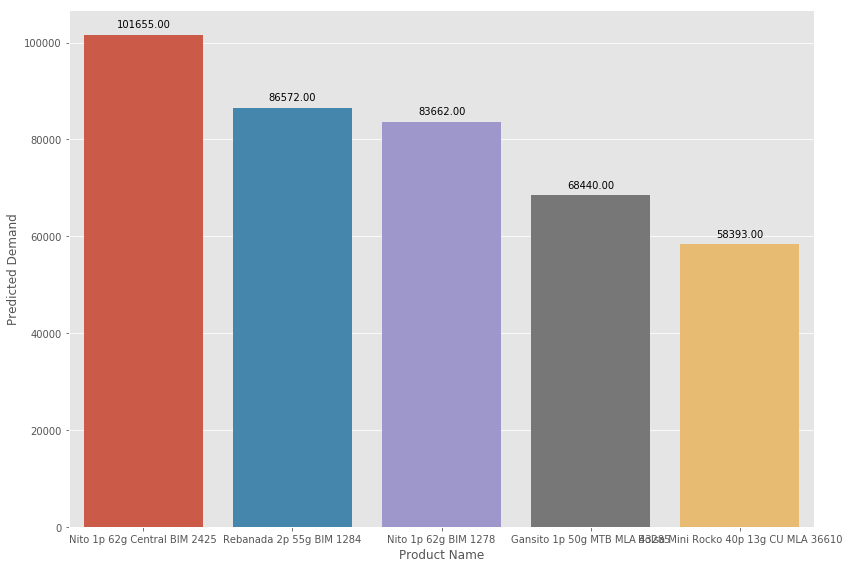

In [126]:
plt.figure(figsize=(12, 8))

plot=sns.barplot(x='NombreProducto', y='Predicted', data=prediksi4.head(5))
# prediksi4.head(10).plot(x='Producto_ID', y='Predicted', kind='bar')
# plt.params(labelsize=16, rotation = 'default')
plt.xlabel('Product Name')
plt.ylabel('Predicted Demand')
# plt.title('Top 5 Product with Highest Predicted Demand',fontsize=25)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.tight_layout()
plt.savefig('fig/6.png', tight_box=True)

plt.savefig('fig/ins/1.png', tight_box=True)

## Contoh 5 

Akan diprediksi produk dengan rata-rata demand tertinggi per permintaan.

In [124]:
prediksi5=test_merge3.groupby(['Producto_ID','NombreProducto'])['Predicted'].mean().reset_index().sort_values(by='Predicted',ascending=False)
prediksi5['Predicted']=prediksi5['Predicted'].apply(np.round).astype(int)
display(prediksi5.head(10))

,Producto_ID,NombreProducto,Predicted
180,7761,Bubulubu 20g RIC 7761,1634
0,53,Burritos Sincro 170g CU LON 53,755
1016,46062,Bollos Carls Jr 5in 520g MTA SL 46062,694
676,36398,Sand Clasico Multigrano Cong 91g CU LON 36398,403
133,5200,Coca Cola Lata 355ml CC 5200,402
450,33794,Salmas 12g CJM SAN 33794,381
508,34851,Medias Noches 16p 680g TNB BIM 34851,370
220,30384,Coca Cola Lata 12p 355ml CC 30384,353
583,35563,Bimbollos Extra FS 6p 480g TNB BIM 35563,343
495,34616,Duo Gansito mas Dalmata 105g SP MLA 34616,309


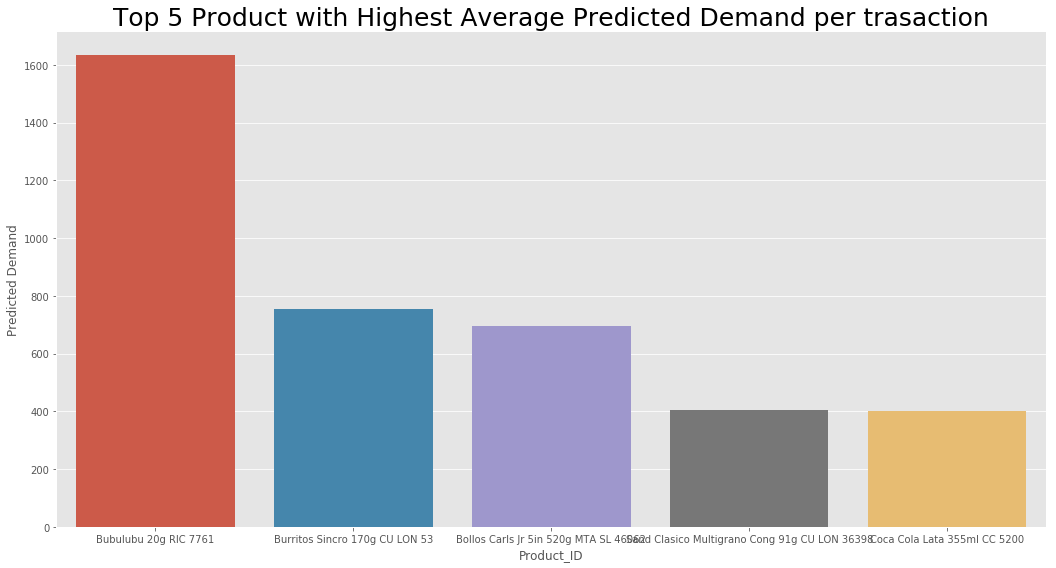

In [125]:
plt.figure(figsize=(15, 8))

sns.barplot(x='NombreProducto', y='Predicted', data=prediksi5.head(5))
# prediksi5.head(20).plot(x='Producto_ID', y='Predicted', kind='bar')
# plt.params(labelsize=16, rotation = 'default')
plt.xlabel('Product_ID')
plt.ylabel('Predicted Demand')
plt.title('Top 5 Product with Highest Average Predicted Demand per trasaction', fontsize=25)

plt.tight_layout()
plt.savefig('fig/6.png', tight_box=True)

## Contoh 6 

Akan diprediksi State dengan demand tertinggi.

In [127]:
prediksi6=test_merge3.groupby(['State'])['Predicted'].sum().reset_index().sort_values(by='Predicted',ascending=False)
prediksi6['Predicted']=prediksi6['Predicted'].apply(np.round).astype(int)
display(prediksi6.head(10))

,State,Predicted
9,ESTADO DE MÉXICO,307440
16,"MÉXICO, D.F.",268949
13,JALISCO,213506
18,NUEVO LEÓN,132956
10,GUANAJUATO,119085
20,PUEBLA,115729
30,VERACRUZ,114799
14,MICHOACÁN,90617
1,BAJA CALIFORNIA NORTE,72526
28,TAMAULIPAS,67413


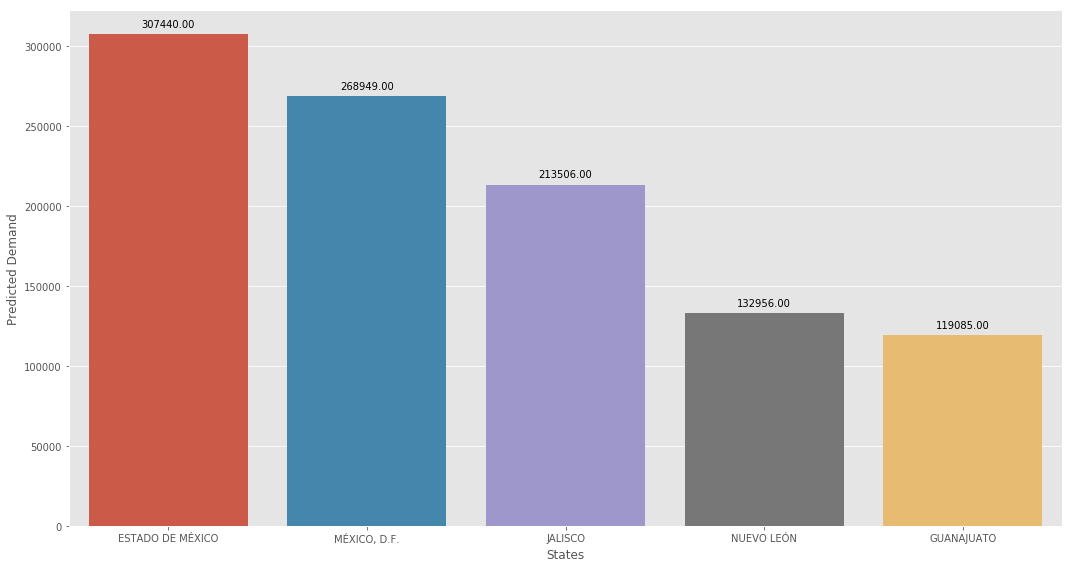

In [128]:
plt.figure(figsize=(15, 8))

plot=sns.barplot(x='State', y='Predicted', data=prediksi6.head(5))
# prediksi6.head(10).plot(x='State', y='Predicted', kind='bar')
# plt.params(labelsize=16, rotation = 'default')
plt.xlabel('States')
plt.ylabel('Predicted Demand')
# plt.title('Top 5 States with Highest Predicted Demand',fontsize=25)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



plt.tight_layout()
plt.savefig('fig/6.png', tight_box=True)

plt.savefig('fig/ins/2.png', tight_box=True)

## Contoh 7 

Akan diprediksi Agency dengan rata-rata demand tertinggi per transaksi.

In [129]:
prediksi7=test_merge3.groupby(['Agencia_ID'])['Predicted'].mean().reset_index().sort_values(by='Predicted',ascending=False)
prediksi7['Predicted']=prediksi7['Predicted'].apply(np.round).astype(int)
display(prediksi7.head(5))

,Agencia_ID,Predicted
159,1452,356
440,2243,268
195,1524,265
287,1674,203
524,4079,146


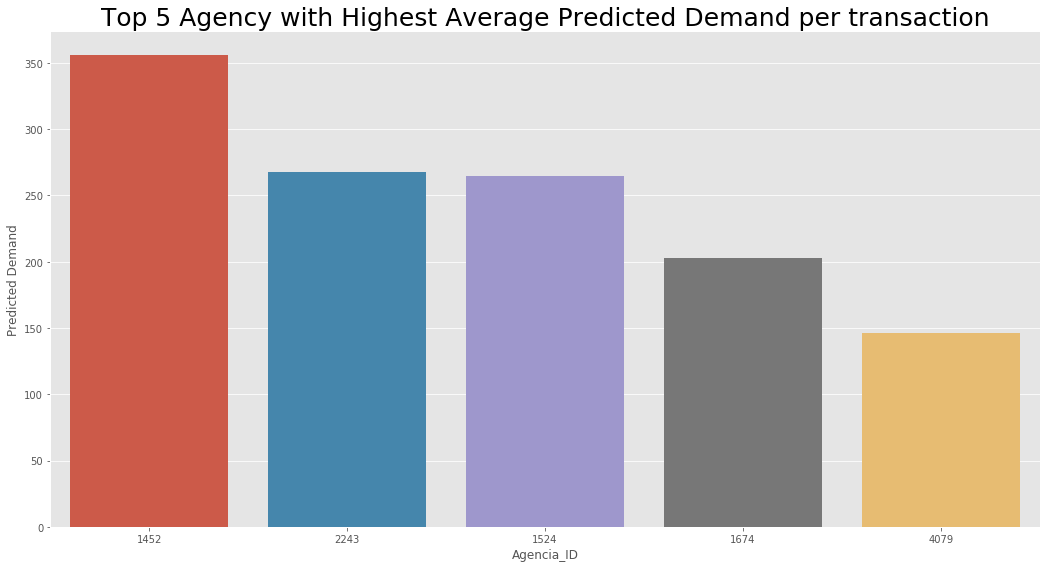

In [130]:
plt.figure(figsize=(15, 8))

sns.barplot(x='Agencia_ID', y='Predicted', data=prediksi7.head(5),order=prediksi7.head(5)['Agencia_ID'])
# prediksi7.head(10).plot(x='State', y='Predicted', kind='bar')
# plt.params(labelsize=16, rotation = 'default')
plt.xlabel('Agencia_ID')
plt.ylabel('Predicted Demand')
plt.title('Top 5 Agency with Highest Average Predicted Demand per transaction',fontsize=25)

plt.tight_layout()
plt.savefig('fig/6.png', tight_box=True)

## Contoh 8

Akan diprediksi Agen dengan demand tertinggi.

In [131]:
prediksi8=test_merge3.groupby(['Agencia_ID'])['Predicted'].sum().reset_index().sort_values(by='Predicted',ascending=False)
prediksi8['Predicted']=prediksi8['Predicted'].apply(np.round).astype(int)
display(prediksi8.head(5))

,Agencia_ID,Predicted
310,1911,23593
311,1912,17514
82,1312,17369
106,1351,17021
102,1347,16538


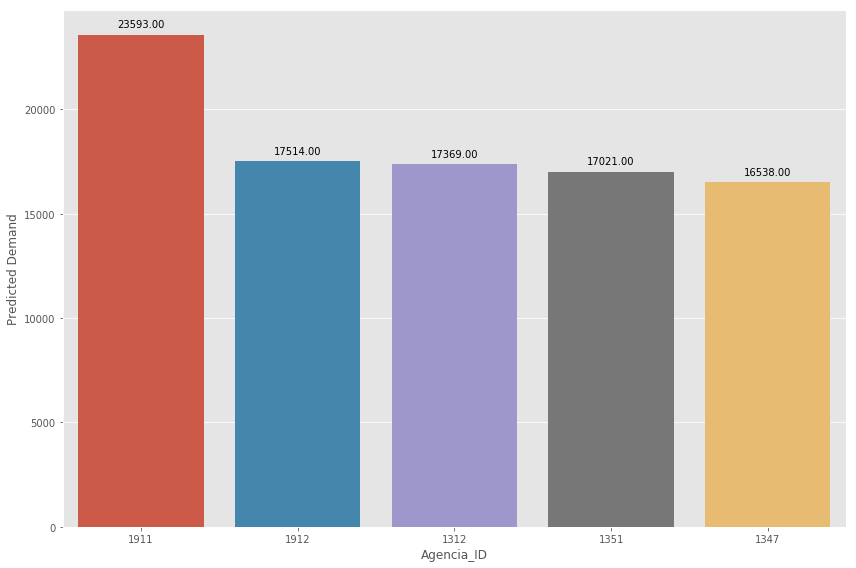

In [132]:
plt.figure(figsize=(12, 8))

plot=sns.barplot(x='Agencia_ID', y='Predicted', data=prediksi8.head(5),order=prediksi8.head(5)['Agencia_ID'])
# prediksi8.head(10).plot(x='Agencia_ID', y='Predicted', kind='bar')
# plt.params(labelsize=16, rotation = 'default')
plt.xlabel('Agencia_ID')
plt.ylabel('Predicted Demand')
# plt.title('Top 5 Agency with Highest Predicted Demand',fontsize=25)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.tight_layout()
plt.savefig('fig/ins/3.png', tight_box=True)